**<font color='red'>Report Submission Information (must be completed before submitting report!)</font>**

* Student Full Name and Number: Hesam ShokriAsri 


# <font color='blue'> Workshop 2 – Machine Learning (ML) [2 weeks] </font> <a name="fontcolorblueWorkshopMachineLearningMLweeksfont"></a>

## Topics Covered <a name="TopicsCovered"></a>
* ML basics and definitions, supervised and unsupervised learning
* Linear regression, model selection, and regularisation
* Clustering, k-means, and Gaussian Mixture Models
* Principal Component Analysis (PCA)
* Support Vector Machines (SVMs)
* Logistic regression
* Performance metrics and hyperparameter selection

![Topic_mindmap](img/WS2topics.png)


## Topic Notes  <a name="TopicNotes"></a>

Optimisation is widely used in engineering (practice and research) today. That was not always so. I expect that in the future machine learning will be as prevalently used in engineering as optimisation is used today. The arguments in favour of it are (a) increasingly more powerful computing (b) lots of data (c) decreasing storage and computing costs. Machine learning benefits substantially from these trends. We will hopefully see together how engineering world will evolve in this century.

In this workshop, you will learn how to solve machine learning problems in practice and apply common algorithms to various data sets. Doing this yourself will give you a chance to connect theoretical knowledge and practical usage. We will start with simple, easy-to-visualise (2D) data sets so that concepts become clear. More interesting problems and data will be posed as open-ended (and optional) problems.

You will also familiarise yourself with machine learning libraries of Python, which is the de-facto language for ML these days. Still, the tools and data are chosen completely for educational reasons (simplicity, accessibility, cost). There are and will be better ML frameworks and more complex data sets but it is not realistic to cover all. Due to time limitations, we unfortunately do not focus on a big topic in this workshop and subject: [data science](https://study.unimelb.edu.au/find/courses/graduate/master-of-data-science/what-will-i-study/). You should not get the wrong impression from the nice, cleaned-up data sets you are given in this workshop. In real life, data is messy and more than half of data science is about preparing data itself. 

> In the future, you should consider learning additional ML software packages and libraries. Finding the right tool for the right job is an important skill obtained through knowledge and experience. I would also recommend learning more about data preparation and analysis. The popular [Pandas](https://pandas.pydata.org/) library, which we briefly use, makes a good starting point.

## Table of Contents  
- [Section 1: Linear Regression, Overfitting, and Regularisation](#SectionLinearRegressionOverfittingandRegularisation)  
 - [Question 1.1 [25%]](#Question)  
- [Section 2: Clustering and Gaussian Mixtures](#SectionClusteringandGaussianMixtures)  
 - [Question 2.1  [10%] K-means clustering](#QuestionKmeansclustering)  
 - [Question 2.2 [15%] GMMs as density estimators](#QuestionGMMsasdensityestimators)  
- [Section 3: PCA and Simple Classification](#SectionPCAandSimpleClassification)  
 - [Question 3.1 [15%] Clustering-based classification](#QuestionClusteringbasedclassification)  
- [Section 4: Support Vector Machines (SVMs)](#SectionSupportVectorMachinesSVMs)  
 - [Question 4.1 [15%] Binary SVM Classifiers](#QuestionBinarySVMClassifiers)  
- [Section 5: Logistic Regression](#SectionLogisticRegression)  
 - [Question 5.1 [5%] Simple Logistic Regression (LR)](#QuestionSimpleLogisticRegressionLR)  
 - [Question 5.2 [15%] Checking Grid Stability using Logistic Regression (LR)](#QuestionCheckingGridStabilityusingLogisticRegressionLR)  


## Workflow and Assessment <a name="WorkflowandAssessment"></a>

This subject follows a problem- and project-oriented approach. In this learning workflow, the focus is on solving practical (engineering) problems, which motivate acquiring theoretical (background) knowledge at the same time.

### Objectives <a name="Objectives"></a>
* Use these problems as a motivation to learn the fundamentals of machine learning covered in lectures.
* Gain hands-on experience with basic machine learning paradigms.
* Familiarise yourself with some of the practical software tools used for machine learning.
* Solve basic machine learning problems using Python Scipy and Scikit-learn.
* Connect theoretical knowledge and practical usage by doing it yourself.
#### Common objectives of all workshops <a name="Commonobjectivesofallworkshops"></a>
Gain hands-on experience and learn by doing! Understand how theoretical knowledge discussed in lectures relates to practice. Develop motivation for gaining further theoretical and practical knowledge beyond the subject material.

> __Self-learning__ is one of the most important skills that you should acquire as a student. Today, self-learning is much easier than it used to be thanks to a plethora of online resources.

### Assessment Process <a name="AssessmentProcess"></a>

1. Follow the procedures described below, perform the given tasks, and answer the workshop questions __in this Python notebook itself! The resulting notebook will be your Workshop Report!__
2. Submit the workshop report at the announced deadline
3. Demonstrators will conduct a brief (5min) oral quiz on your submitted report in the subsequent weeks.
4. Your workshop marks will be a combination of the report you submitted and oral quiz results.


> __The goal is to learn__, NOT blindly follow the procedures in the fastest possible way! __Do not simply copy-paste answers (from Internet, friends, etc.). You can and should use all available resources but only to develop your own understanding. If you copy-paste, you will pay the price in the oral quiz!__




# Section 1: Linear Regression, Overfitting, and Regularisation <a name="SectionLinearRegressionOverfittingandRegularisation"></a>

## _Example 1.1: Using curve fitting to model Diode characteristics_ <a name="ExampleUsingcurvefittingtomodelDiodecharacteristics"></a>

![Diode characteristic](img/diode.png)

The diagram above shows the I-V curve of a [diode](https://en.wikipedia.org/wiki/Diode) widely used in electronic circuits, see [1N4001-D spec sheet (right click to download)](1N4001-D.pdf).

We can use regression to model the I-V curve of this diode at 25$^{\circ}$C.

Using the nice tool, [WebPlotDigitizer](https://automeris.io/WebPlotDigitizer/), a small and clean data set is generated and stored in [csv format](https://en.wikipedia.org/wiki/Comma-separated_values). We now use the famous [pandas library](https://pandas.pydata.org/) to read the *csv* file.

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import matplotlib

dataset=pd.read_csv('files/diode_dataset.csv', names=['Vf', 'If'])
# Note that if you don't put names to csv or into the function as above, 
# pandas ignores the first row in calculations!
dataset.head()

,Vf,If
0,0.794737,0.100714
1,0.801316,0.111255
2,0.806579,0.127593
3,0.811842,0.140954
4,0.815789,0.153793


<IPython.core.display.Javascript object>


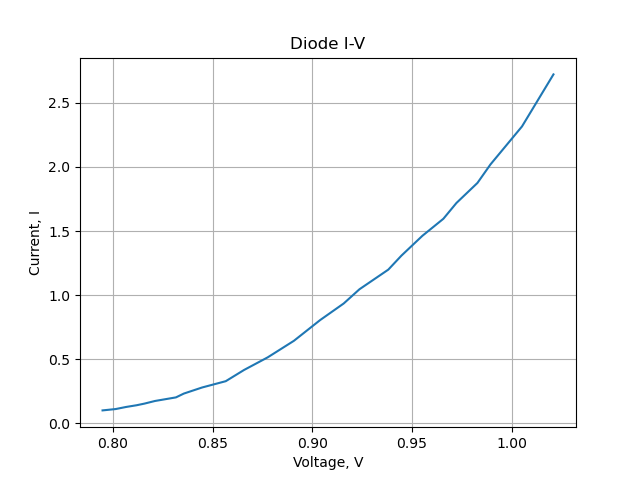

In [2]:
plt.figure()
plt.plot(dataset.values[:,0], dataset.values[:,1])
plt.xlabel('Voltage, V')
plt.ylabel('Current, I')
plt.title('Diode I-V')
plt.grid()
plt.show()

_Note that the figure above is convex but the one above was looking concave! Can you see why?_

### Question 1.1 [20%] <a name="Question"></a>

Now let's consider the linear model $I=f(V)=a+bV$, for $a, b \in \mathbb{R}$ for simplicity.

We can find the best $(a, b)$ that minimises the error between the $N$ data points $(I_j, V_j)$ and this linear model by solving the optimisation problem 

$$\min_{a, b} \sum_{j=1}^N (I_j- (a + b V_j))^2 $$

This is equivalent *in spirit* to what the machine learning libraries such as *scikit-learn (sklearn)* do to solve this problem! As you will repeatedly see, there is a deep and close relationship between optimisation and many learning methods.

1. Find the optimal $a, b$ pair by solving the unconstrained optimisation problem above using *pyomo*. Using the formula and the parameters, $a, b$, you derived, plot the linear I-V curve with the additional constraint $I \geq 0$ or $\max(I, 0)$.
2. First, fit a [linear model](https://scikit-learn.org/stable/modules/linear_model.html) using "linear_model.LinearRegression()". Plot the result, find the coefficients, and calculate the mean squared error (MSE).
3. Next, fit a [polynomial model](https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions) of second degree, i.e. a quadratic model. Plot the model, find the coefficients, and calculate MSE. Interpret and discuss the results.
4. Add a regularisation term, i.e use [ridge regression](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression). Do you observe an improvement? Discuss.
5. Try a couple of higher order models (e.g. 4, 6) without regularisation, and provide the results as before. What do you observe when you compare the coefficients? Find validation and training errors for the models and discuss/interpret your results.

#### Hints <a name="Hints"></a>
1. you will need to use [pipelines](https://scikit-learn.org/stable/modules/compose.html#pipeline). To access coefficients use `model.named_steps['linearregression'].coef_` or `model.named_steps['ridge'].coef_`
2. the `train_test_split` function provides a very convenient way of shuffling the data and dividing it into  training and test sets (3:1 default ratio), see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [3]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# full data in correct form for sklearn
Vfulldata = np.array(dataset.values[:,0]).reshape(-1,1) # reshape needed for sklearn functions
Ifulldata = np.array(dataset.values[:,1]).reshape(-1,1)

# split into training and test sets
Vtrain, Vtest, Itrain, Itest = train_test_split(Vfulldata, Ifulldata)

#####################################
Question 1.1 - part 1
#####################################

Model unknown

  Variables:
    a : Size=1, Index=None
        Key  : Lower : Value              : Upper : Fixed : Stale : Domain
        None :  None : -8.691267803430165 :  None : False : False :  Reals
    b : Size=1, Index=None
        Key  : Lower : Value              : Upper : Fixed : Stale : Domain
        None :  None : 10.714559790870089 :  None : False : False :  Reals

  Objectives:
    obj : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True : 0.7726144097041545

  Constraints:
    None

#####################################


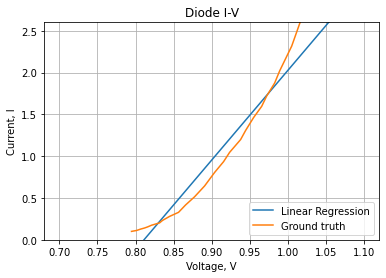

In [5]:
## Question 1.1 - part 1 ##

from pyomo.environ import *
import pyomo.environ as pyo
from pyomo.opt import SolverFactory
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

print('#####################################')
print('Question 1.1 - part 1')
print('#####################################')
print()

dataset=pd.read_csv('files/diode_dataset.csv', names=['Vf', 'If'])
dataset.head()

V_f = dataset.values[:,0]
I_f = dataset.values[:,1]

# parameters
N=len(I_f)

model = ConcreteModel()

# index
model.I = range(N)

# variables
model.a = pyo.Var()
model.b = pyo.Var()

# objective function
model.obj = Objective(expr=sum ( ( I_f[i] - ( model.a + model.b *V_f[i] ) )**2 for i in model.I) , sense = minimize )

# define solver
opt = pyo.SolverFactory('ipopt')
opt.solve(model) 

# show results
model.display()

print()
print('#####################################')

a=model.a.value
b=model.b.value

def I(V):
    I = a + b * V
    return I

#### plot ####
V=np.linspace(0.7,1.1,100)
I=I(V)
plt.figure()
plt.plot(V,I)

plt.plot(V_f , I_f)

plt.xlabel('Voltage, V')
plt.ylabel('Current, I')
plt.title('Diode I-V')
plt.legend(["Linear Regression", "Ground truth"], loc ="lower right")
plt.ylim((0,2.6))
plt.grid()
plt.show()


#####################################
Question 1.1 - part 2
#####################################

number of training data for V is =  18
number of training data for I is =  18
number of testing data for V is =  7
number of testing data for I is =  7

Coefficients: 
 
 [[10.05248208]]

Mean squared error: 0.08



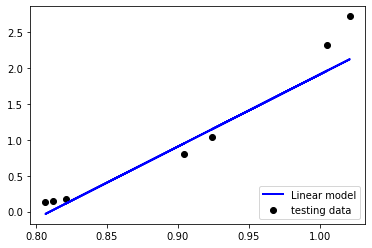

In [23]:
## Question 1.1 - part 2 ##

import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

print('#####################################')
print('Question 1.1 - part 2')
print('#####################################')
print()

# load dataset
dataset=pd.read_csv('files/diode_dataset.csv', names=['Vf', 'If'])
dataset.head()

V_f = dataset.values[:,0]
I_f = dataset.values[:,1]

# full data in correct form for sklearn (reshape needed for sklearn functions)
Vfulldata = np.array(V_f).reshape(-1,1)
Ifulldata = np.array(I_f).reshape(-1,1)

# split into training and test sets
V_train, V_test, I_train, I_test = train_test_split(Vfulldata, Ifulldata)

print('number of training data for V is = ', len(V_train))
print('number of training data for I is = ', len(I_train))

print('number of testing data for V is = ', len(V_test))
print('number of testing data for I is = ', len(I_test))

print()

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(V_train, I_train)

# Make predictions using the testing set
I_pred = regr.predict(V_test)

# The coefficients
print("Coefficients: \n \n", regr.coef_)
print()
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(I_test, I_pred))
print()

# Plot outputs
plt.figure()
plt.scatter(V_test, I_test, color="black")
plt.plot(V_test, I_pred, color="blue", linewidth=2)
plt.legend(["Linear model", "testing data"], loc ="lower right")

plt.show()


#####################################
Question 1.1 - part 3
#####################################

number of training data for V is =  18
number of training data for I is =  18
number of testing data for V is =  7
number of testing data for I is =  7

Coefficients: 
 
 [[  0.         -69.44637406  44.49582398]]

Mean squared error for a model with M = 2 is = 0.000254



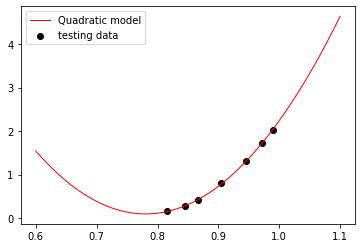

In [62]:
## Question 1.1 - part 3 ##

import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

print('#####################################')
print('Question 1.1 - part 3')
print('#####################################')
print()

# load dataset
dataset=pd.read_csv('files/diode_dataset.csv', names=['Vf', 'If'])
dataset.head()

V_f = dataset.values[:,0]
I_f = dataset.values[:,1]

# full data in correct form for sklearn (reshape needed for sklearn functions)
Vfulldata = np.array(V_f).reshape(-1,1)
Ifulldata = np.array(I_f).reshape(-1,1)

# split into training and test sets
V_train, V_test, I_train, I_test = train_test_split(Vfulldata, Ifulldata)

print('number of training data for V is = ', len(V_train))
print('number of training data for I is = ', len(I_train))

print('number of testing data for V is = ', len(V_test))
print('number of testing data for I is = ', len(I_test))

print()

polynomial_features = PolynomialFeatures(degree = 2)

Phi_V_train = polynomial_features.fit_transform(V_train)

#----------------------------------------------------------------------------------------#
# Step 1: define and train a model

model = LinearRegression()

model.fit(Phi_V_train, I_train)

#----------------------------------------------------------------------------------------#
# Step 2: calculate coefficients and MSE

Phi_V_test = polynomial_features.fit_transform(V_test)
I_pred = model.predict(Phi_V_test)

# The coefficients
print("Coefficients: \n \n", model.coef_)
print()
# The mean squared error
print("Mean squared error for a model with M = 2 is = %7f" % mean_squared_error(I_test, I_pred))
print()

#----------------------------------------------------------------------------------------#
# Step 3: prediction

# Plot outputs

plt.figure()
plt.scatter(V_test, I_test, color="black")
V = np.linspace(0.6,1.1,100)
V = np.array(V).reshape(-1,1)
Phi_V = polynomial_features.fit_transform(V)
I_pred = model.predict(Phi_V)
plt.plot(V, I_pred, color="red", linewidth=1)
plt.legend(["Quadratic model" , "testing data"], loc ="upper left")

plt.show()


When the metaparameter (M) has a lower amount, by increasing that, the mean squared error (MSE) for the testing data are reduced and the coefficients increase. However, we know that if the M is much bigger (for example, 8), the MSE will increase incredibly by increasing the M. This is because the overfitting happens. Thus, there is an optimal M to have the lowest MSE for the testing data.

In [ ]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])
Ridge(alpha=0.5)
reg.coef_
array([0.34545455, 0.34545455])
reg.intercept_
0.13636...

#####################################
Question 1.1 - part 4
#####################################

number of training data for V is =  18
number of training data for I is =  18
number of testing data for V is =  7
number of testing data for I is =  7

Coefficients: 
 
 [[  0.         -63.65816662  41.22203376]]

Mean squared error for a model without regularisation is = 0.0015304



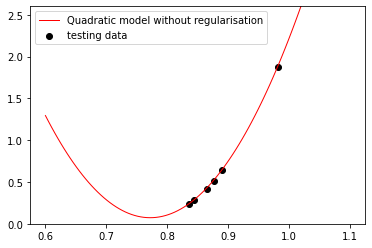

Coefficients: 
 
 [[0.         1.02393278 1.84317483]]

Mean squared error for a model with regularisation is = 0.3605647



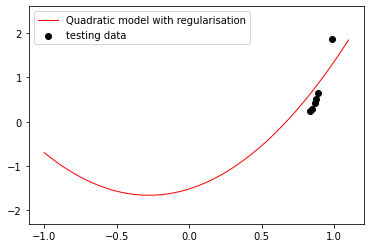

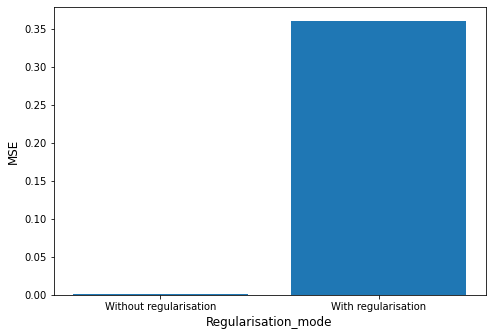

In [6]:
## Question 1.1 - part 4 ##

import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

print('#####################################')
print('Question 1.1 - part 4')
print('#####################################')
print()

# load dataset
dataset=pd.read_csv('files/diode_dataset.csv', names=['Vf', 'If'])
dataset.head()

V_f = dataset.values[:,0]
I_f = dataset.values[:,1]

# full data in correct form for sklearn (reshape needed for sklearn functions)
Vfulldata = np.array(V_f).reshape(-1,1)
Ifulldata = np.array(I_f).reshape(-1,1)

# split into training and test sets
V_train, V_test, I_train, I_test = train_test_split(Vfulldata, Ifulldata)

print('number of training data for V is = ', len(V_train))
print('number of training data for I is = ', len(I_train))

print('number of testing data for V is = ', len(V_test))
print('number of testing data for I is = ', len(I_test))

print()

polynomial_features = PolynomialFeatures(degree = 2)

Phi_V_train = polynomial_features.fit_transform(V_train)

#----------------------------------------------------------------------------------------#
# Step 1: define and train a model without regularisation

model = LinearRegression()

model.fit(Phi_V_train, I_train)

#----------------------------------------------------------------------------------------#
# Step 2: calculate coefficients and MSE

Phi_V_test = polynomial_features.fit_transform(V_test)
I_pred = model.predict(Phi_V_test)

# The coefficients
print("Coefficients: \n \n", model.coef_)
print()
# The mean squared error
print("Mean squared error for a model without regularisation is = %.7f" % mean_squared_error(I_test, I_pred))
print()

MSE=np.zeros(shape = (2) )
MSE[0] = (mean_squared_error(I_test, I_pred))

#----------------------------------------------------------------------------------------#
# Step 3: prediction

# Plot outputs

plt.figure()
plt.scatter(V_test, I_test, color="black")
V = np.linspace(0.6,1.1,100)
V = np.array(V).reshape(-1,1)
Phi_V = polynomial_features.fit_transform(V)
I_pred = model.predict(Phi_V)
plt.plot(V, I_pred, color="red", linewidth=1)
plt.legend(["Quadratic model without regularisation" , "testing data"], loc ="upper left")
plt.ylim((0,2.6))
plt.show()

#----------------------------------------------------------------------------------------#
# Step 1: define and train a model with regularisation

polynomial_features = PolynomialFeatures(degree = 2)

Phi_V_train = polynomial_features.fit_transform(V_train)

model_regularisation = linear_model.Ridge(alpha=0.5)

model_regularisation.fit(Phi_V_train, I_train)

#----------------------------------------------------------------------------------------#
# Step 2: calculate coefficients and MSE

Phi_V_test = polynomial_features.fit_transform(V_test)
I_pred_regularisation = model_regularisation.predict(Phi_V_test)

# The coefficients
print("Coefficients: \n \n", model_regularisation.coef_)
print()
# The mean squared error
print("Mean squared error for a model with regularisation is = %.7f" % mean_squared_error(I_test, I_pred_regularisation))
print()

MSE[1] = (mean_squared_error(I_test, I_pred_regularisation))

#----------------------------------------------------------------------------------------#
# Step 3: prediction

# Plot outputs

plt.figure()
plt.scatter(V_test, I_test, color="black")
V = np.linspace(-1,1.1,100)
V = np.array(V).reshape(-1,1)
Phi_V = polynomial_features.fit_transform(V)
I_pred_regularisation = model_regularisation.predict(Phi_V)
plt.plot(V, I_pred_regularisation, color="red", linewidth=1)
plt.legend(["Quadratic model with regularisation" , "testing data"], loc ="upper left")
plt.ylim((-2.3,2.6))
plt.show()


## plot MSE
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Regularisation_mode = ['Without regularisation', 'With regularisation']
MSE_reg = [MSE[0],MSE[1]]
ax.bar(Regularisation_mode,MSE_reg)
plt.xlabel('Regularisation_mode', fontsize = 12)
plt.ylabel('MSE', fontsize = 12)
plt.show()


By adding the regularisation term, the coefficients are reduced incredibly. However, the MSE increases.

#####################################
Question 1.1 - part 5
#####################################

number of training data for V is =  18
number of training data for I is =  18
number of testing data for V is =  7
number of testing data for I is =  7

Coefficients for M = 4 is : 
 
 [[    0.         -2683.88820358  4432.55661942 -3264.43635148
    908.21906841]]

Mean squared error for the testing data M = 4 is : 0.0003367

Mean squared error for the training data M = 4 is : 0.0001701



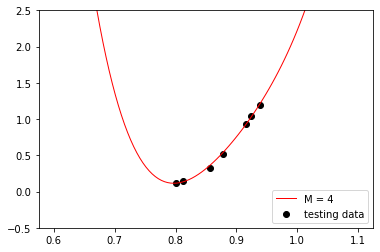

Coefficients for M = 6 is : 
 
 [[      0.           61639.85897207 -150346.25084857  190354.3339066
  -130649.02957947   45282.11742039   -5967.32530379]]

Mean squared error for the testing data and M = 6 is : 0.0001648

Mean squared error for the training data and M = 6 is : 0.0000588



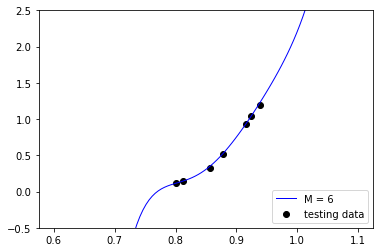

Coefficients for M = 8 is : 
 
 [[ 0.00000000e+00 -5.51523297e+07  2.13685946e+08 -4.72503280e+08
   6.52193468e+08 -5.75439844e+08  3.16946236e+08 -9.96383749e+07
   1.36883566e+07]]

Mean squared error for the testing data and M = 8 is : 0.0001339

Mean squared error for the training data and M = 8 is : 0.0000547



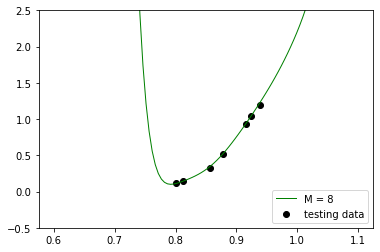

Coefficients for M = 10 is : 
 
 [[ 0.00000000e+00 -1.06085724e+10  5.40487895e+10 -1.63011808e+11
   3.22305382e+11 -4.36519566e+11  4.10128908e+11 -2.63950177e+11
   1.11361088e+11 -2.78125574e+10  3.12248218e+09]]

Mean squared error for the testing data and M = 10 is : 0.0002403

Mean squared error for the training data and M = 10 is : 0.0000438



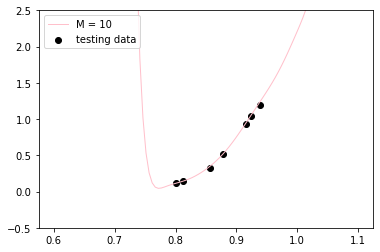

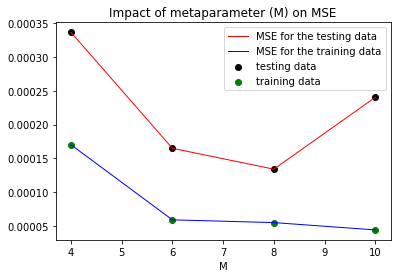

In [8]:
## Question 1.1 - part 5 ##

import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

print('#####################################')
print('Question 1.1 - part 5')
print('#####################################')
print()

# load dataset
dataset=pd.read_csv('files/diode_dataset.csv', names=['Vf', 'If'])
dataset.head()

V_f = dataset.values[:,0]
I_f = dataset.values[:,1]

# full data in correct form for sklearn (reshape needed for sklearn functions)
Vfulldata = np.array(V_f).reshape(-1,1)
Ifulldata = np.array(I_f).reshape(-1,1)

# split into training and test sets
V_train, V_test, I_train, I_test = train_test_split(Vfulldata, Ifulldata)

print('number of training data for V is = ', len(V_train))
print('number of training data for I is = ', len(I_train))

print('number of testing data for V is = ', len(V_test))
print('number of testing data for I is = ', len(I_test))

print()

# --------------------------------------- M = 4 --------------------------------------- #

polynomial_features_4 = PolynomialFeatures(degree = 4)

Phi_V_train_4 = polynomial_features_4.fit_transform(V_train)

model_4 = LinearRegression()

model_4.fit(Phi_V_train_4, I_train)

Phi_V_test_4 = polynomial_features_4.fit_transform(V_test)
I_pred_4_test = model_4.predict(Phi_V_test_4)
I_pred_4_train = model_4.predict(Phi_V_train_4)

# The coefficients
print("Coefficients for M = 4 is : \n \n", model_4.coef_)
print()
# The mean squared error
print("Mean squared error for the testing data M = 4 is : %.7f" % mean_squared_error(I_test, I_pred_4_test))
print()

print("Mean squared error for the training data M = 4 is : %.7f" % mean_squared_error(I_train, I_pred_4_train))
print()

MSE_test=np.zeros(shape = (4 , 2) )
MSE_train=np.zeros(shape = (4 , 2) )

MSE_test[0] = (4 , mean_squared_error(I_test, I_pred_4_test))
MSE_train[0] = (4 , mean_squared_error(I_train, I_pred_4_train))

# Plot outputs
plt.figure()
plt.scatter(V_test, I_test, color="black")
V = np.linspace(0.6,1.1,100)
V = np.array(V).reshape(-1,1)
Phi_V_4 = polynomial_features_4.fit_transform(V)
I_pred_4 = model_4.predict(Phi_V_4)
plt.plot(V, I_pred_4, color="red", linewidth=1)
plt.legend(["M = 4 " , "testing data"], loc ="lower right")
plt.ylim((-0.5,2.5))
plt.show()

# --------------------------------------- M = 6 --------------------------------------- #

polynomial_features_6 = PolynomialFeatures(degree = 6)

Phi_V_train_6 = polynomial_features_6.fit_transform(V_train)

model_6 = LinearRegression()

model_6.fit(Phi_V_train_6, I_train)

Phi_V_test_6 = polynomial_features_6.fit_transform(V_test)
I_pred_6_test = model_6.predict(Phi_V_test_6)
I_pred_6_train = model_6.predict(Phi_V_train_6)

# The coefficients
print("Coefficients for M = 6 is : \n \n", model_6.coef_)
print()
# The mean squared error
print("Mean squared error for the testing data and M = 6 is : %.7f" % mean_squared_error(I_test, I_pred_6_test))
print()

print("Mean squared error for the training data and M = 6 is : %.7f" % mean_squared_error(I_train, I_pred_6_train))
print()

MSE_test[1] = (6 , mean_squared_error(I_test, I_pred_6_test))
MSE_train[1] = (6 , mean_squared_error(I_train, I_pred_6_train))

# Plot outputs
plt.figure()
plt.scatter(V_test, I_test, color="black")
Phi_V_6 = polynomial_features_6.fit_transform(V)
I_pred_6 = model_6.predict(Phi_V_6)
plt.plot(V, I_pred_6, color="blue", linewidth=1)
plt.legend(["M = 6 " , "testing data"], loc ="lower right")
plt.ylim((-0.5,2.5))
plt.show()

# --------------------------------------- M = 8 --------------------------------------- #

polynomial_features_8 = PolynomialFeatures(degree = 8)

Phi_V_train_8 = polynomial_features_8.fit_transform(V_train)

model_8 = LinearRegression()

model_8.fit(Phi_V_train_8, I_train)

Phi_V_test_8 = polynomial_features_8.fit_transform(V_test)
I_pred_8_test = model_8.predict(Phi_V_test_8)
I_pred_8_train = model_8.predict(Phi_V_train_8)

# The coefficients
print("Coefficients for M = 8 is : \n \n", model_8.coef_)
print()
# The mean squared error
print("Mean squared error for the testing data and M = 8 is : %.7f" % mean_squared_error(I_test, I_pred_8_test))
print()

print("Mean squared error for the training data and M = 8 is : %.7f" % mean_squared_error(I_train, I_pred_8_train))
print()

MSE_test[2] = (8 , mean_squared_error(I_test, I_pred_8_test))
MSE_train[2] = (8 , mean_squared_error(I_train, I_pred_8_train))

# Plot outputs
plt.figure()
plt.scatter(V_test, I_test, color="black")
Phi_V_8 = polynomial_features_8.fit_transform(V)
I_pred_8 = model_8.predict(Phi_V_8)
plt.plot(V, I_pred_8, color="green", linewidth=1)
plt.legend(["M = 8 " , "testing data"], loc ="lower right")
plt.ylim((-0.5,2.5))
plt.show()

# --------------------------------------- M = 10 --------------------------------------- #

polynomial_features_10 = PolynomialFeatures(degree = 10)

Phi_V_train_10 = polynomial_features_10.fit_transform(V_train)

model_10 = LinearRegression()

model_10.fit(Phi_V_train_10, I_train)

Phi_V_test_10 = polynomial_features_10.fit_transform(V_test)
I_pred_10_test = model_10.predict(Phi_V_test_10)
I_pred_10_train = model_10.predict(Phi_V_train_10)

# The coefficients
print("Coefficients for M = 10 is : \n \n", model_10.coef_)
print()
# The mean squared error
print("Mean squared error for the testing data and M = 10 is : %.7f" % mean_squared_error(I_test, I_pred_10_test))
print()

print("Mean squared error for the training data and M = 10 is : %.7f" % mean_squared_error(I_train, I_pred_10_train))
print()

MSE_test[3] = (10 , mean_squared_error(I_test, I_pred_10_test))
MSE_train[3] = (10 , mean_squared_error(I_train, I_pred_10_train))


# Plot outputs
plt.figure()
plt.scatter(V_test, I_test, color="black")
Phi_V_10 = polynomial_features_10.fit_transform(V)
I_pred_10 = model_10.predict(Phi_V_10)
plt.plot(V, I_pred_10, color="pink", linewidth=1)
plt.legend(["M = 10 " , "testing data"], loc ="upper left")
plt.ylim((-0.5,2.5))
plt.show()

## plot MSE for the testing data
plt.figure()
x = MSE_test[:,0]
y = MSE_test[:,1]
plt.scatter(x , y, color="black")
plt.plot(x , y , color="red", linewidth=1)

## plot MSE for the training data
x = MSE_train[:,0]
y = MSE_train[:,1]
plt.scatter(x , y, color="green")
plt.plot(x , y , color="blue", linewidth=1)
plt.xlabel('M')
plt.legend(["MSE for the testing data", "MSE for the training data" , "testing data" , "training data"], loc ="upper right")
plt.title('Impact of metaparameter (M) on MSE')
plt.show()


When the metaparameter (M) has a lower amount, by increasing that (M), the mean squared error (MSE) for the testing data are reduced and the coefficients increase. However, if the M is much bigger (for example, 8), the MSE for the testing data starts to increase. Thus, there is an optimal M to have the lowest MSE for the testing data.

But the MSE for the training data always are reduced by increasing the metaparameter M which is called overfitting.

# Section 2: Clustering and Gaussian Mixtures <a name="SectionClusteringandGaussianMixtures"></a>

Unsupervised learning is all about data. We will use first the famous two moon data set to practice a little bit and digest some of the fundemental concepts. Since two moons data inherently has two clusters (each moon as a cluster), we can use this as a [ground truth](https://en.wikipedia.org/wiki/Ground_truth). In most real problems, we don't have this luxury of having the ground truth at hand! 

**Note** that Scikit Learn does not have its own global random state but uses the [numpy random state](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.seed.html#numpy.random.seed) instead. See the code below.

### Important Note on Random Number/Vector Generation <a name="ImportantNoteonRandomNumberVectorGeneration"></a>

**Each group has to use a different number seed (which is an arbitrary number as illustrated above) and groups cannot share seeds. The pseudo-randomness is used here to create diversity. Otherwise, if groups use the same seed, the results will be the same (opening the door to plagiarism) and significant number of points will be taken off! As a practical hint, you can use a modified-combination of your student numbers**

<IPython.core.display.Javascript object>


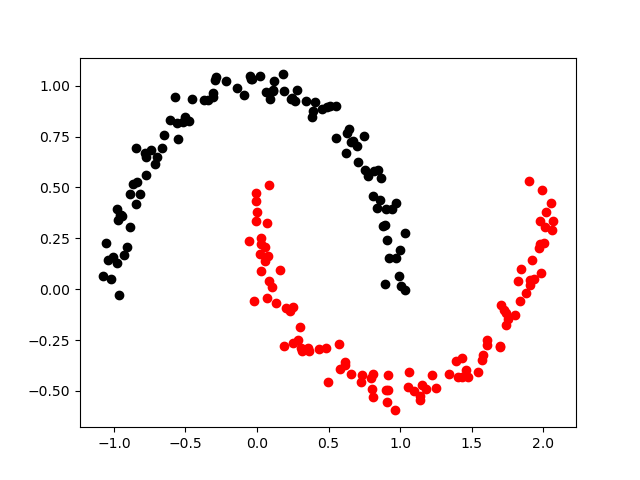

In [4]:
from sklearn import cluster, datasets, mixture
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn import decomposition
from sklearn.mixture import GaussianMixture
from sklearn import metrics

# Set a random seed as you did in optimisation workshop by uncommenting the line below!
#np.random.seed(Put here a group-specific number!)

noisy_moons = datasets.make_moons(n_samples=200, noise=0.05)
X = noisy_moons[0] # data points
y = noisy_moons[1] # 0, 1 labels of class, 50 each - giving us the ground truth

order_ind = np.argsort(y) # order labels, 50 each class
X1 = X[order_ind[0:100]]   # class 1
X2 = X[order_ind[101:200]] # class 2

# Plot data
plt.figure()
plt.scatter(X1[:,0], X1[:,1], color='black')
plt.scatter(X2[:,0], X2[:,1], color='red')
plt.show()

### Question 2.1  [10%] K-means clustering  <a name="QuestionKmeansclustering"></a>

1. Use sklearn's k-means clustering algorithm to divide the two moon data given above ($X$) into two clusters. Plot the result and show the cluster centres that you found.
2. Experiment with different starting points (`init='random'`) and number of clusters, e.g. 3, 4, 5. Write your observations and interpret them using your theoretical knowledge from lectures and books.

#####################################
Question 2.1 - part 1
#####################################



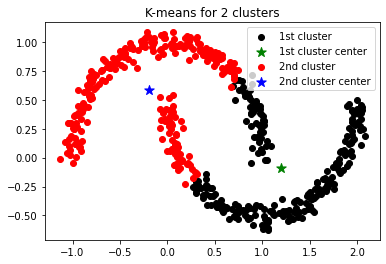

In [135]:
## Question 2.1 - part 1 ##

print('#####################################')
print('Question 2.1 - part 1')
print('#####################################')
print()

from sklearn import cluster, datasets, mixture
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn import decomposition
from sklearn.mixture import GaussianMixture
from sklearn import metrics
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

random = np.random.seed(69007044)

noisy_moons = datasets.make_moons(n_samples=500, noise=0.05)
X = noisy_moons[0] # data points
kmeans = KMeans(n_clusters=2, random_state=random).fit(X)
label=kmeans.labels_

cluster0=[]
cluster1=[]
for count,item in enumerate(label):
    if item==0:
        cluster0.append(X[count])
    elif item ==1:
        cluster1.append(X[count])

cluster0=np.array(cluster0)
cluster1=np.array(cluster1)

mean_cluster0 = np.mean(cluster0, axis=0)
mean_cluster1 = np.mean(cluster1, axis=0)

plt.scatter(cluster0[:,0], cluster0[:,1], color='black')
plt.scatter(mean_cluster0[0], mean_cluster0[1], color='green' , s = 100 , marker='*')
plt.scatter(cluster1[:,0], cluster1[:,1], color='red')
plt.scatter(mean_cluster1[0], mean_cluster1[1], color='blue' , s = 100 , marker='*')

plt.legend(["1st cluster" , "1st cluster center" , "2nd cluster" , "2nd cluster center"], loc ="upper right")
plt.title('K-means for 2 clusters')

plt.show()

#####################################
Question 2.1 - part 2.a ( different starting points )
#####################################



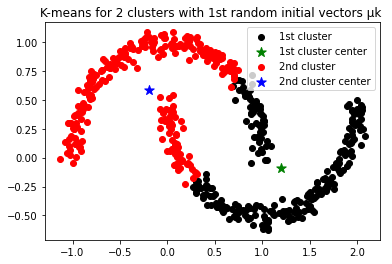

None


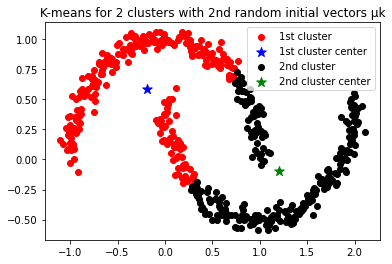

In [16]:
## Question 2.1 - part 2.a ( different starting points ) ##

print('#####################################')
print('Question 2.1 - part 2.a ( different starting points )')
print('#####################################')
print()

from sklearn import cluster, datasets, mixture
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn import decomposition
from sklearn.mixture import GaussianMixture
from sklearn import metrics
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

cost_function=[]

random_1 = np.random.seed(69007044)

noisy_moons = datasets.make_moons(n_samples=500, noise=0.05)
X = noisy_moons[0] # data points
kmeans = KMeans(n_clusters=2, random_state=random_1).fit(X)
label=kmeans.labels_

cluster0=[]
cluster1=[]
for count,item in enumerate(label):
    if item==0:
        cluster0.append(X[count])
    elif item ==1:
        cluster1.append(X[count])

cluster0=np.array(cluster0)
cluster1=np.array(cluster1)

mean_cluster0 = np.mean(cluster0, axis=0)
mean_cluster1 = np.mean(cluster1, axis=0)

plt.scatter(cluster0[:,0], cluster0[:,1], color='black')
plt.scatter(mean_cluster0[0], mean_cluster0[1], color='green' , s = 100 , marker='*')
plt.scatter(cluster1[:,0], cluster1[:,1], color='red')
plt.scatter(mean_cluster1[0], mean_cluster1[1], color='blue' , s = 100 , marker='*')

plt.legend(["1st cluster" , "1st cluster center" , "2nd cluster" , "2nd cluster center"], loc ="upper right")
plt.title('K-means for 2 clusters with 1st random initial vectors μk ')

plt.show()

random_2 = np.random.seed(70446900)
print(random_2)
noisy_moons = datasets.make_moons(n_samples=500, noise=0.05)
X = noisy_moons[0] # data points
kmeans = KMeans(n_clusters=2, random_state=random_2).fit(X)
label=kmeans.labels_

cluster0=[]
cluster1=[]
for count,item in enumerate(label):
    if item==0:
        cluster0.append(X[count])
    elif item ==1:
        cluster1.append(X[count])

cluster0=np.array(cluster0)
cluster1=np.array(cluster1)

mean_cluster0 = np.mean(cluster0, axis=0)
mean_cluster1 = np.mean(cluster1, axis=0)

plt.scatter(cluster0[:,0], cluster0[:,1], color='red')
plt.scatter(mean_cluster0[0], mean_cluster0[1], color='blue' , s = 100 , marker='*')
plt.scatter(cluster1[:,0], cluster1[:,1], color='black')
plt.scatter(mean_cluster1[0], mean_cluster1[1], color='green' , s = 100 , marker='*')

plt.legend(["1st cluster" , "1st cluster center" , "2nd cluster" , "2nd cluster center"], loc ="upper right")
plt.title('K-means for 2 clusters with 2nd random initial vectors μk')

plt.show()

K-means method always converges and we can get the local minimum in its iterative method because both of its two steps reduce the cost function. But we cannot guarantee to get the global minimum because the optimization problem is not convex (It is mixed-integer problem). Also, different initial vectors μk in the K-means method (different starting points in the iterative optimization method for the cost function of the K-means method) result different clusters and different cluster centers. I mean, clusters and their centers depend on the initial vectors μk.

#####################################
Question 2.1 - part 2.b (different number of clusters)
#####################################

The cost function for K = 2 is =  203.01346251785884


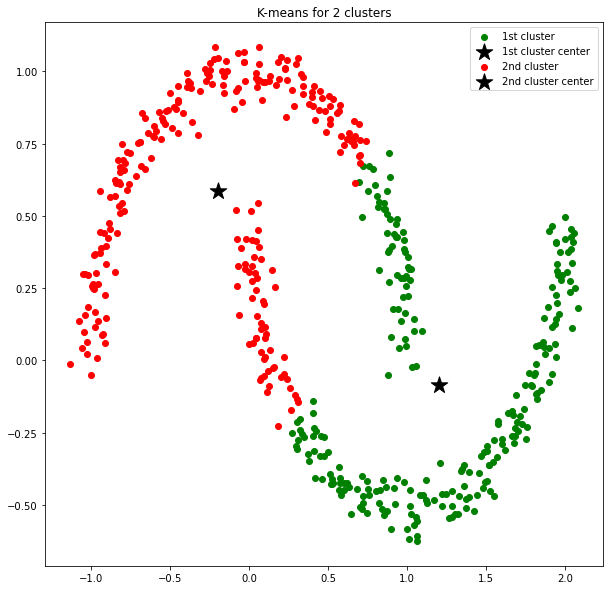

The cost function for K = 3 is =  135.56433964026834


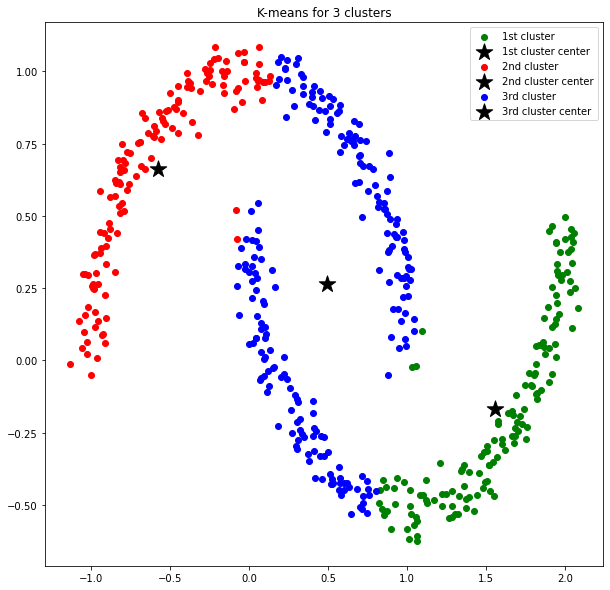

The cost function for K = 4 is =  88.78919064503538


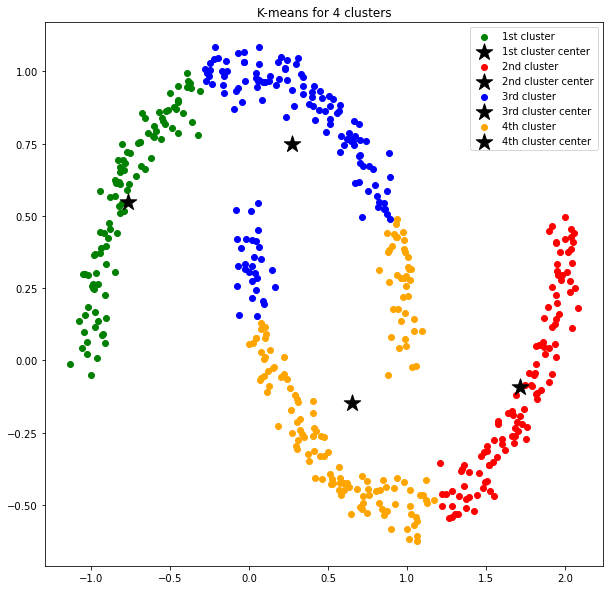

The cost function for K = 5 is =  65.96346172934254


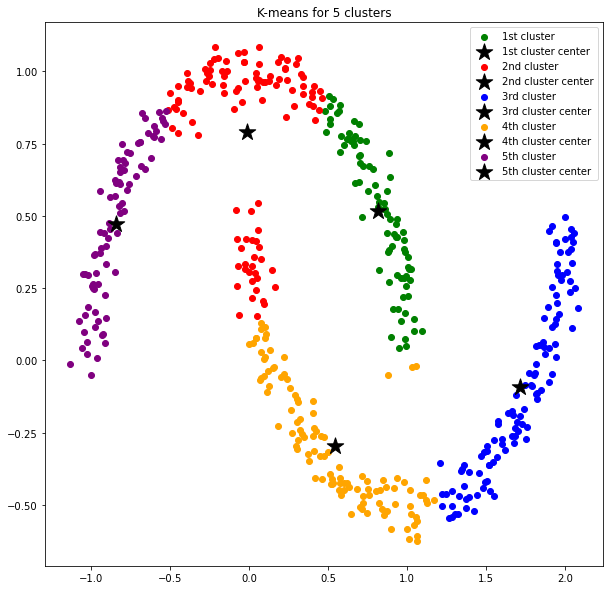

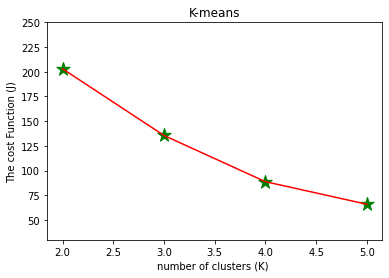

In [15]:
## Question 2.1 - part 2.b (different number of clusters) ##

print('#####################################')
print('Question 2.1 - part 2.b (different number of clusters)')
print('#####################################')
print()

from sklearn import cluster, datasets, mixture
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn import decomposition
from sklearn.mixture import GaussianMixture
from sklearn import metrics
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

cost_function=[]

################################################# two clusters ################################################
random = np.random.seed(69007044)

noisy_moons = datasets.make_moons(n_samples=500, noise=0.05)
X = noisy_moons[0] # data points
kmeans = KMeans(n_clusters=2, random_state=random).fit(X)
label=kmeans.labels_

print('The cost function for K = 2 is = ' , abs(kmeans.score(X)))
cost_function.append(abs(kmeans.score(X)))

cluster0=[]
cluster1=[]
for count,item in enumerate(label):
    if item == 0:
        cluster0.append(X[count])
    elif item == 1:
        cluster1.append(X[count])

cluster0=np.array(cluster0)
cluster1=np.array(cluster1)

mean_cluster0 = np.mean(cluster0, axis=0)
mean_cluster1 = np.mean(cluster1, axis=0)

plt.figure(figsize=(10, 10))

plt.scatter(cluster0[:,0], cluster0[:,1], color='green')
plt.scatter(mean_cluster0[0], mean_cluster0[1], color='black' , s = 300 , marker='*')
plt.scatter(cluster1[:,0], cluster1[:,1], color='red')
plt.scatter(mean_cluster1[0], mean_cluster1[1], color='black' , s = 300 , marker='*')

plt.legend(["1st cluster" , "1st cluster center" , "2nd cluster" , "2nd cluster center"], loc ="upper right")
plt.title('K-means for 2 clusters')

plt.show()

######################################### three clusters #################################
random = np.random.seed(69007044)

noisy_moons = datasets.make_moons(n_samples=500, noise=0.05)
X = noisy_moons[0] # data points
kmeans = KMeans(n_clusters=3, random_state=random).fit(X)
label=kmeans.labels_

print('The cost function for K = 3 is = ' , abs(kmeans.score(X)))
cost_function.append(abs(kmeans.score(X)))

cluster0=[]
cluster1=[]
cluster2=[]
for count,item in enumerate(label):
    if item == 0:
        cluster0.append(X[count])
    elif item == 1:
        cluster1.append(X[count])
    elif item == 2:
        cluster2.append(X[count])

cluster0=np.array(cluster0)
cluster1=np.array(cluster1)
cluster2=np.array(cluster2)

mean_cluster0 = np.mean(cluster0, axis=0)
mean_cluster1 = np.mean(cluster1, axis=0)
mean_cluster2 = np.mean(cluster2, axis=0)

#####
plt.figure(figsize=(10, 10))

plt.scatter(cluster0[:,0], cluster0[:,1], color='green')
plt.scatter(mean_cluster0[0], mean_cluster0[1], color='black' , s = 300 , marker='*')

plt.scatter(cluster1[:,0], cluster1[:,1], color='red')
plt.scatter(mean_cluster1[0], mean_cluster1[1], color='black' , s = 300 , marker='*')

plt.scatter(cluster2[:,0], cluster2[:,1], color='blue')
plt.scatter(mean_cluster2[0], mean_cluster2[1], color='black' , s = 300 , marker='*')

#####
plt.legend(["1st cluster" , "1st cluster center" , "2nd cluster" , "2nd cluster center" , "3rd cluster" , "3rd cluster center"], loc ="upper right")
plt.title('K-means for 3 clusters')

plt.show()
######################################### four clusters #################################
random = np.random.seed(69007044)

noisy_moons = datasets.make_moons(n_samples=500, noise=0.05)
X = noisy_moons[0] # data points
kmeans = KMeans(n_clusters=4, random_state=random).fit(X)
label=kmeans.labels_

print('The cost function for K = 4 is = ' , abs(kmeans.score(X)))
cost_function.append(abs(kmeans.score(X)))

cluster0=[]
cluster1=[]
cluster2=[]
cluster3=[]
for count,item in enumerate(label):
    if item == 0:
        cluster0.append(X[count])
    elif item == 1:
        cluster1.append(X[count])
    elif item == 2:
        cluster2.append(X[count])
    elif item == 3:
        cluster3.append(X[count])

cluster0=np.array(cluster0)
cluster1=np.array(cluster1)
cluster2=np.array(cluster2)
cluster3=np.array(cluster3)

mean_cluster0 = np.mean(cluster0, axis=0)
mean_cluster1 = np.mean(cluster1, axis=0)
mean_cluster2 = np.mean(cluster2, axis=0)
mean_cluster3 = np.mean(cluster3, axis=0)

#####
plt.figure(figsize=(10, 10))

plt.scatter(cluster0[:,0], cluster0[:,1], color='green')
plt.scatter(mean_cluster0[0], mean_cluster0[1], color='black' , s = 300 , marker='*')

plt.scatter(cluster1[:,0], cluster1[:,1], color='red')
plt.scatter(mean_cluster1[0], mean_cluster1[1], color='black' ,  s = 300 , marker='*')

plt.scatter(cluster2[:,0], cluster2[:,1], color='blue')
plt.scatter(mean_cluster2[0], mean_cluster2[1], color='black' , s = 300 , marker='*')

plt.scatter(cluster3[:,0], cluster3[:,1], color='orange')
plt.scatter(mean_cluster3[0], mean_cluster3[1], color='black' , s = 300 , marker='*')

#####
plt.legend(["1st cluster" , "1st cluster center" , "2nd cluster" , "2nd cluster center" , "3rd cluster" , "3rd cluster center" , "4th cluster" , "4th cluster center"], loc ="upper right")
plt.title('K-means for 4 clusters')
plt.show()

######################################### five clusters #################################
random = np.random.seed(69007044)

noisy_moons = datasets.make_moons(n_samples=500, noise=0.05)
X = noisy_moons[0] # data points
kmeans = KMeans(n_clusters=5, random_state=random).fit(X)
label=kmeans.labels_

print('The cost function for K = 5 is = ' , abs(kmeans.score(X)))
cost_function.append(abs(kmeans.score(X)))

cluster0=[]
cluster1=[]
cluster2=[]
cluster3=[]
cluster4=[]
for count,item in enumerate(label):
    if item == 0:
        cluster0.append(X[count])
    elif item == 1:
        cluster1.append(X[count])
    elif item == 2:
        cluster2.append(X[count])
    elif item == 3:
        cluster3.append(X[count])
    elif item == 4:
        cluster4.append(X[count])

cluster0=np.array(cluster0)
cluster1=np.array(cluster1)
cluster2=np.array(cluster2)
cluster3=np.array(cluster3)
cluster4=np.array(cluster4)

mean_cluster0 = np.mean(cluster0, axis=0)
mean_cluster1 = np.mean(cluster1, axis=0)
mean_cluster2 = np.mean(cluster2, axis=0)
mean_cluster3 = np.mean(cluster3, axis=0)
mean_cluster4 = np.mean(cluster4, axis=0)

#####
plt.figure(figsize=(10, 10))

plt.scatter(cluster0[:,0], cluster0[:,1], color='green')
plt.scatter(mean_cluster0[0], mean_cluster0[1], color='black' , s = 300 , marker='*')

plt.scatter(cluster1[:,0], cluster1[:,1], color='red')
plt.scatter(mean_cluster1[0], mean_cluster1[1], color='black' , s = 300 , marker='*')

plt.scatter(cluster2[:,0], cluster2[:,1], color='blue')
plt.scatter(mean_cluster2[0], mean_cluster2[1], color='black' , s = 300 , marker='*')

plt.scatter(cluster3[:,0], cluster3[:,1], color='orange')
plt.scatter(mean_cluster3[0], mean_cluster3[1], color='black' , s = 300 , marker='*')

plt.scatter(cluster4[:,0], cluster4[:,1], color='purple')
plt.scatter(mean_cluster4[0], mean_cluster4[1], color='black' , s = 300 , marker='*')

#####
plt.legend(["1st cluster" , "1st cluster center" , "2nd cluster" , "2nd cluster center" , "3rd cluster" , "3rd cluster center" , "4th cluster" , "4th cluster center" , "5th cluster" , "5th cluster center"], loc ="upper right")
plt.title('K-means for 5 clusters')
plt.show()


plt.scatter([2,3,4,5], cost_function, color='green', s = 200 , marker='*')
plt.plot([2,3,4,5], cost_function, color='red')
plt.xlabel('number of clusters (K) ')
plt.ylabel('The cost Function (J)')
plt.title('K-means')
plt.ylim((30,250))
plt.show()


With increasing number of clusters (K), the cost function (J) is reduced because the centers of clusters are nearer to the data of their own cluster. But different number of clusters result different clusters. For example, if we want to assign the data points to 4 clusters, some data points are assigned to a cluster but those data points are not assigned to that cluster when we want to have 5 clusters.

### Question 2.2 [15%] GMMs as density estimators  <a name="QuestionGMMsasdensityestimators"></a>

1. Now use a Gaussian Mixture Model (GMM) for clustering the same two moon data. Try two clusters and plot your results. GMMs also provides you probabilities (of a sample belonging to a cluster). Print those of a few samples.
2. Increase the number of components of your GMM model. What do you observe? Use a metric to choose the number of components in a principled way. *Hint: check [BIC](https://en.wikipedia.org/wiki/Bayesian_information_criterion) or [AIC](https://en.wikipedia.org/wiki/Akaike_information_criterion)*
3. It is maybe better to use GMM as a **generative model**! Generate 200 brand new samples from a trained GMM with your choice of parameters and plot your results. Discuss your findings!

#####################################
Question 2.2 - part 1 
#####################################

Data_1 is :  [0.87, 0.49]
The probability of the blonging the data_1 to the cluster 1 is :  0.5220796135075607
The probability of the blonging the data_1 to the cluster 2 is :  0.4779203864924395
Thus, we can say that it blongs to the cluster :  1

Data_1 is :  [1.5, -0.5]
The probability of the blonging the data_2 to the cluster 1 is :  4.30093710040551e-07
The probability of the blonging the data_2 to the cluster 2 is :  0.9999995699062901
Thus, we can say that it blongs to the cluster :  2



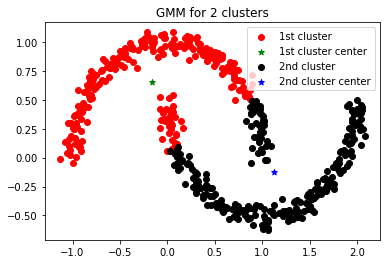

In [2]:
## Question 2.2 - part 1 ##

print('#####################################')
print('Question 2.2 - part 1 ')
print('#####################################')
print()

from sklearn import cluster, datasets, mixture
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn import decomposition
from sklearn.mixture import GaussianMixture
from sklearn import metrics
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

cost_function=[]
random = np.random.seed(69007044)
noisy_moons = datasets.make_moons(n_samples=500, noise=0.05)
X = noisy_moons[0] # data points
gm = GaussianMixture(n_components=2, random_state=0).fit(X)
# print(gm.means_)
train_label=gm.predict(X)
cluster0=[]
cluster1=[]
for count,item in enumerate(train_label):
    if item == 0:
        cluster0.append(X[count])
    elif item == 1:
        cluster1.append(X[count])

cluster0=np.array(cluster0)
cluster1=np.array(cluster1)

mean_cluster0 = np.mean(cluster0, axis=0)
mean_cluster1 = np.mean(cluster1, axis=0)

# plt.show()
plt.scatter(cluster0[:,0], cluster0[:,1], color='red')
plt.scatter(mean_cluster0[0], mean_cluster0[1], color='green' , marker='*')
plt.scatter(cluster1[:,0], cluster1[:,1], color='black')
plt.scatter(mean_cluster1[0], mean_cluster1[1], color='blue' ,  marker='*')
plt.legend(["1st cluster" , "1st cluster center" , "2nd cluster" , "2nd cluster center"], loc ="upper right")
plt.title('GMM for 2 clusters')

data_1 = [0.87, 0.49]
print('Data_1 is : ' , data_1)
print('The probability of the blonging the data_1 to the cluster 1 is : ' , gm.predict_proba([data_1])[0][0])
print('The probability of the blonging the data_1 to the cluster 2 is : ' , gm.predict_proba([data_1])[0][1])
print('Thus, we can say that it blongs to the cluster : ' , 1 + gm.predict([data_1])[0])
print()

data_2 = [1.5, -0.5]
print('Data_1 is : ' , data_2)
print('The probability of the blonging the data_2 to the cluster 1 is : ' , gm.predict_proba([data_2])[0][0])
print('The probability of the blonging the data_2 to the cluster 2 is : ' , gm.predict_proba([data_2])[0][1])
print('Thus, we can say that it blongs to the cluster : ' , 1 + gm.predict([data_2])[0])
print()


#####################################
Question 2.2 - part 2 
#####################################



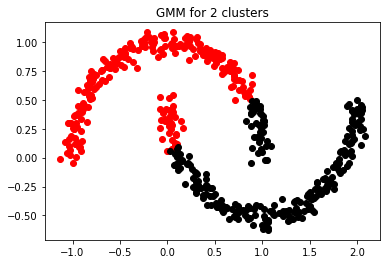

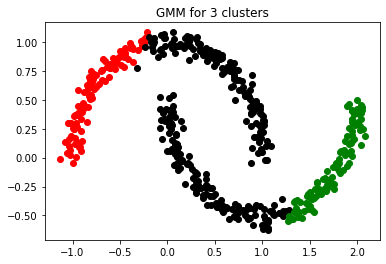

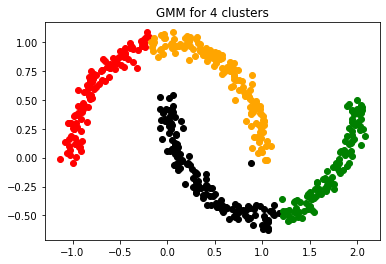

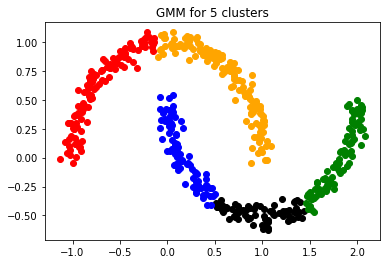

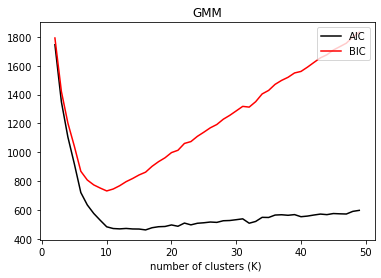

In [48]:
## Question 2.2 - part 2 ##

print('#####################################')
print('Question 2.2 - part 2 ')
print('#####################################')
print()

from sklearn import cluster, datasets, mixture
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn import decomposition
from sklearn.mixture import GaussianMixture
from sklearn import metrics
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

################################ two cluster ###################################

random = np.random.seed(69007044)
noisy_moons = datasets.make_moons(n_samples=500, noise=0.05)
X = noisy_moons[0] # data points
gm = GaussianMixture(n_components=2, random_state=0).fit(X)
# print(gm.means_)
train_label=gm.predict(X)

cluster0=[]
cluster1=[]
for count,item in enumerate(train_label):
    if item == 0:
        cluster0.append(X[count])
    elif item == 1:
        cluster1.append(X[count])

cluster0=np.array(cluster0)
cluster1=np.array(cluster1)

plt.scatter(cluster0[:,0], cluster0[:,1], color='red')
plt.scatter(cluster1[:,0], cluster1[:,1], color='black')
plt.title('GMM for 2 clusters')
plt.show()

################################ three cluster ###################################
random = np.random.seed(69007044)
noisy_moons = datasets.make_moons(n_samples=500, noise=0.05)
X = noisy_moons[0] # data points
gm = GaussianMixture(n_components=3, random_state=0).fit(X)
# print(gm.means_)
train_label=gm.predict(X)

cluster0=[]
cluster1=[]
cluster2=[]
for count,item in enumerate(train_label):
    if item == 0:
        cluster0.append(X[count])
    elif item == 1:
        cluster1.append(X[count])
    elif item == 2:
        cluster2.append(X[count])

cluster0=np.array(cluster0)
cluster1=np.array(cluster1)
cluster2=np.array(cluster2)

plt.scatter(cluster0[:,0], cluster0[:,1], color='red')
plt.scatter(cluster1[:,0], cluster1[:,1], color='black')
plt.scatter(cluster2[:,0], cluster2[:,1], color='green')
plt.title('GMM for 3 clusters')
plt.show()

################################ four cluster ###################################
random = np.random.seed(69007044)
noisy_moons = datasets.make_moons(n_samples=500, noise=0.05)
X = noisy_moons[0] # data points
gm = GaussianMixture(n_components=4, random_state=0).fit(X)
# print(gm.means_)
train_label=gm.predict(X)

cluster0=[]
cluster1=[]
cluster2=[]
cluster3=[]
for count,item in enumerate(train_label):
    if item == 0:
        cluster0.append(X[count])
    elif item == 1:
        cluster1.append(X[count])
    elif item == 2:
        cluster2.append(X[count])
    elif item == 3:
        cluster3.append(X[count])

cluster0=np.array(cluster0)
cluster1=np.array(cluster1)
cluster2=np.array(cluster2)
cluster3=np.array(cluster3)

plt.scatter(cluster0[:,0], cluster0[:,1], color='red')
plt.scatter(cluster1[:,0], cluster1[:,1], color='black')
plt.scatter(cluster2[:,0], cluster2[:,1], color='green')
plt.scatter(cluster3[:,0], cluster3[:,1], color='orange')
plt.title('GMM for 4 clusters')
plt.show()

################################ five cluster ###################################
random = np.random.seed(69007044)
noisy_moons = datasets.make_moons(n_samples=500, noise=0.05)
X = noisy_moons[0] # data points
gm = GaussianMixture(n_components=5, random_state=0).fit(X)
train_label=gm.predict(X)

cluster0=[]
cluster1=[]
cluster2=[]
cluster3=[]
cluster4=[]
for count,item in enumerate(train_label):
    if item == 0:
        cluster0.append(X[count])
    elif item == 1:
        cluster1.append(X[count])
    elif item == 2:
        cluster2.append(X[count])
    elif item == 3:
        cluster3.append(X[count])
    elif item == 4:
        cluster4.append(X[count])

cluster0=np.array(cluster0)
cluster1=np.array(cluster1)
cluster2=np.array(cluster2)
cluster3=np.array(cluster3)
cluster4=np.array(cluster4)

plt.scatter(cluster0[:,0], cluster0[:,1], color='red')
plt.scatter(cluster1[:,0], cluster1[:,1], color='black')
plt.scatter(cluster2[:,0], cluster2[:,1], color='green')
plt.scatter(cluster3[:,0], cluster3[:,1], color='orange')
plt.scatter(cluster4[:,0], cluster4[:,1], color='blue')
plt.title('GMM for 5 clusters')
plt.show()

############################### aic and bic ####################################
aic_metric=[]
bic_metric=[]
random = np.random.seed(69007044)
noisy_moons = datasets.make_moons(n_samples=500, noise=0.05)
X = noisy_moons[0] # data points
for i in range(2,50):
    gm = GaussianMixture(n_components=i, random_state=0).fit(X)
    aic_metric.append(gm.aic(X))
    bic_metric.append(gm.bic(X))

plt.plot(range(2,50), aic_metric, color='black')

plt.plot(range(2,50), bic_metric, color='red')

plt.legend(["AIC" , "BIC"], loc ="upper right")
plt.xlabel('number of clusters (K) ')
plt.title('GMM')
plt.show()

By increasing the number of components, the overfitting can happen. We can use BIC and AIC as two criteria to prevent the overfitting problem. They introduce a penalty term for the number of components in the model.

BIC = k * Ln(n) - 2 * Ln(L)

AIC = k * 2 - 2 * Ln(L)

L = The maximized value of the likelihood function of the model

n = Number of data points

k = The number of components

As it can be seen, the penalty term is larger in BIC than in AIC.

The AIC tells us that around 10-15 is the best choice. However, the BIC suggests a simpler model with the number of components around 8 - 10 .

#####################################
Question 2.2 - part 3 
#####################################



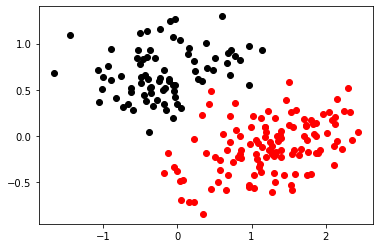

In [1]:
## Question 2.2 - part 3 ##

print('#####################################')
print('Question 2.2 - part 3 ')
print('#####################################')
print()

from sklearn import cluster, datasets, mixture
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn import decomposition
from sklearn.mixture import GaussianMixture
from sklearn import metrics
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

cluster0=[]
cluster1=[]
random = np.random.seed(69007044)
noisy_moons = datasets.make_moons(n_samples=500, noise=0.05)
X = noisy_moons[0] # data points

gm = GaussianMixture(n_components=2, random_state=random).fit(X)
created_Data=gm.sample(200)

for count,item in enumerate(created_Data[1]):
    if item == 0:
        cluster0.append(created_Data[0][count])
    elif item == 1:
        cluster1.append(created_Data[0][count])

cluster0=np.array(cluster0)
cluster1=np.array(cluster1)

plt.scatter(cluster0[:,0], cluster0[:,1], color='black')
plt.scatter(cluster1[:,0], cluster1[:,1], color='red')

plt.show()


GMM can generate new data points but K-means cannot. This is because K-means just takes data points and assigns them to the clusters. However, the generated data by GMM are fake not real data, and if our model is not correct, we will deceive ourselves and go in the wrong path. 

# Section 3: PCA and Simple Classification <a name="SectionPCAandSimpleClassification"></a>

It is time to move beyond the toy data set. The next data set is still small and clean but is more interesting!

## _Example 3.1: Wireless Indoor Localization_ <a name="ExampleWirelessIndoorLocalization"></a>

The next data set shows the recorded signal strength from 7 different base stations at a smart phone. The phone is in one of the four rooms {1, 2, 3, 4}. The goal is to classify the location of the phone to one of the four rooms.

This [dataset](http://archive.ics.uci.edu/ml/datasets/Wireless+Indoor+Localization) was used in the following publications:
> * Jayant G Rohra, Boominathan Perumal, Swathi Jamjala Narayanan, Priya Thakur, and Rajen B Bhatt, 'User Localization in an Indoor Environment Using Fuzzy Hybrid of Particle Swarm Optimization & Gravitational Search Algorithm with Neural Networks', in Proceedings of Sixth International Conference on Soft Computing for Problem Solving,2017, pp. 286-295.
> * Rajen Bhatt, 'Fuzzy-Rough Approaches for Pattern Classification: Hybrid measures, Mathematical analysis, Feature selection algorithms, Decision tree algorithms, Neural learning, and Applications', Amazon Books 


In [5]:
dataw = pd.read_csv('files/wifi_localization.csv', names=[f"s{i}" for i in range(1, 8)] + ['Room Number'])
dataw.head() # comment one to see the other
dataw.tail()

,s1,s2,s3,s4,s5,s6,s7,Room Number
1995,-59,-59,-48,-66,-50,-86,-94,4
1996,-59,-56,-50,-62,-47,-87,-90,4
1997,-62,-59,-46,-65,-45,-87,-88,4
1998,-62,-58,-52,-61,-41,-90,-85,4
1999,-59,-50,-45,-60,-45,-88,-87,4


In [1]:
print(dataw.size, dataw.shape)

16000 (2000, 8)


In [6]:
SRI = dataw.iloc[:,:7]
# a.shape
loc = dataw.iloc[:,7]-1 
# loc.shape

# split into training and test sets
SRItrain, SRItest, loctrain, loctest = train_test_split(SRI, loc)

### Question 3.1 [15%] Clustering-based classification  <a name="QuestionClusteringbasedclassification"></a>

1.  Use k-means clustering on the training data to find the 4 cluster corresponding to the rooms. Then, test their quality using a [mutual information based score.](https://scikit-learn.org/stable/modules/clustering.html#mutual-information-based-scores) 
2.  Conduct a [PCA analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) on the data with 2, 3, 4 features: find singular values, variance ratios, and plot in 2D or 3D (for 2 or 3 features). What is the number of features that balances information and complexity? Is there redundancy in data? Discuss.
3. Now, repeat k-means clustering with the PCA-transformed data. Do you see an improvement in scores? Why or why not? Discuss, based on your knowledge of PCA and k-means clustering. 
4. What information does k-means ignore when used for classification? Is what we do a good classification method? What can you say about the complexity of the problem given?

In [7]:
## Question 3.1 - part 1 ##

print('#####################################')
print('Question 3.1 - part 1 ')
print('#####################################')
print()

from sklearn import cluster, datasets, mixture
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn import decomposition
from sklearn.mixture import GaussianMixture
from sklearn import metrics
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

dataset=pd.read_csv('files/wifi_localization.csv',header=None)

X = dataset.values[:,0:7]
Y = dataset.values[:,7]

random = np.random.seed(69007044)

kmeans = KMeans(n_clusters=4, random_state=random).fit(X)
predict_label=kmeans.labels_

print('K-means clustering quality is : ' , metrics.adjusted_mutual_info_score(Y, predict_label))


#####################################
Question 3.1 - part 1 
#####################################

K-means clustering quality is :  0.8871530457012681


#####################################
Question 3.1 - part 2 
#####################################

variance ratio in the case of reduction the dimension to 2 :  [0.65587897 0.19869441]
singular values in the case of reduction the dimension to 2:  [782.99443538 430.96266874]


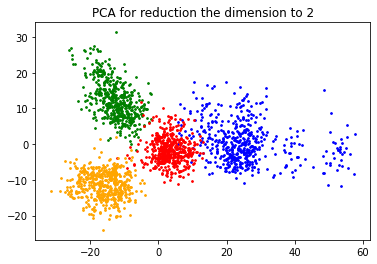



variance ratio in the case of reduction the dimension to 3 :  [0.65587897 0.19869441 0.04942925]
singular values in the case of reduction the dimension to 3 :  [782.99443538 430.96266874 214.95069305]


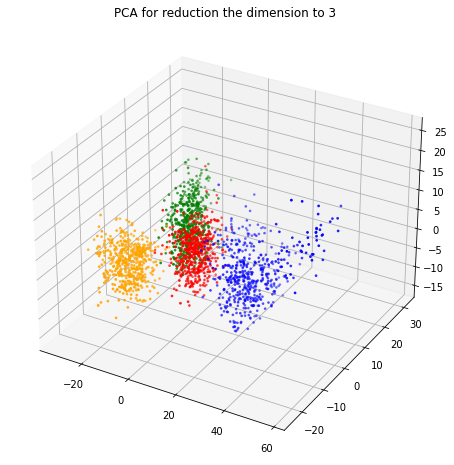



variance ratio in the case of reduction the dimension to 4 :  [0.65587897 0.19869441 0.04942925 0.03029916]
singular values in the case of reduction the dimension to 4 :  [782.99443538 430.96266874 214.95069305 168.29148088]


In [14]:
## Question 3.1 - part 2 ##

print('#####################################')
print('Question 3.1 - part 2 ')
print('#####################################')
print()

import numpy as np
from sklearn.decomposition import PCA
from sklearn import cluster, datasets, mixture
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn import decomposition
from sklearn.mixture import GaussianMixture
from mpl_toolkits import mplot3d
from sklearn import metrics
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

dataset=pd.read_csv('files/wifi_localization.csv',header=None)

X = dataset.values[:,0:7]
Y = dataset.values[:,7]
random = np.random.seed(69007044)
# print(X,Y)
#################################### 2 dimension ###################################
pca = PCA(n_components=2,random_state=random)
pca.fit(X)

print('variance ratio in the case of reduction the dimension to 2 : ',pca.explained_variance_ratio_)
print('singular values in the case of reduction the dimension to 2: ' ,pca.singular_values_)

X_PCA_2=pca.transform(X)

class1=[]
class2=[]
class3=[]
class4=[]
for count,item in enumerate(Y):
    if item == 1:
        class1.append(X_PCA_2[count])
    elif item == 2:
        class2.append(X_PCA_2[count])
    elif item == 3:
        class3.append(X_PCA_2[count])
    elif item == 4:
        class4.append(X_PCA_2[count])

class1=np.array(class1)
class2=np.array(class2)
class3=np.array(class3)
class4=np.array(class4)

#####
plt.scatter(class1[:,0], class1[:,1], color='green',s=3)
plt.scatter(class2[:,0], class2[:,1], color='blue',s=3)
plt.scatter(class3[:,0], class3[:,1], color='red',s=3)
plt.scatter(class4[:,0], class4[:,1], color='orange',s=3)
plt.title('PCA for reduction the dimension to 2')

plt.show()

#################################### 3 dimension ###################################
pca = PCA(n_components=3,random_state=random)
pca.fit(X)

print()
print()
print('variance ratio in the case of reduction the dimension to 3 : ',pca.explained_variance_ratio_)
print('singular values in the case of reduction the dimension to 3 : ' ,pca.singular_values_)

X_PCA_3=pca.transform(X)

class1=[]
class2=[]
class3=[]
class4=[]
for count,item in enumerate(Y):
    if item == 1:
        class1.append(X_PCA_3[count])
    elif item == 2:
        class2.append(X_PCA_3[count])
    elif item == 3:
        class3.append(X_PCA_3[count])
    elif item == 4:
        class4.append(X_PCA_3[count])

class1=np.array(class1)
class2=np.array(class2)
class3=np.array(class3)
class4=np.array(class4)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

ax.scatter(class1[:,0], class1[:,1], class1[:,2], color='green', s=3)
ax.scatter(class2[:,0], class2[:,1], class2[:,2], color='blue', s=3)
ax.scatter(class3[:,0], class3[:,1], class3[:,2], color='red', s=3)
ax.scatter(class4[:,0], class4[:,1], class4[:,2], color='orange', s=3)
plt.title('PCA for reduction the dimension to 3')
plt.show()

#################################### 4 dimension ###################################
pca = PCA(n_components=4,random_state=random)
pca.fit(X)

print()
print()
print('variance ratio in the case of reduction the dimension to 4 : ',pca.explained_variance_ratio_)
print('singular values in the case of reduction the dimension to 4 : ' ,pca.singular_values_)


Having lower dimension by using PCA method cuases lossing the information but On the other hand, it reduces the complexity. Thus, we should do trade off between the having enough information (features) and lower complexity. In this question, conducting a PCA analysis on the data with 3 features reduces the complexity enough, and also does not lose more information. Therefore, we can say that 3 features balances the information and complexity better than other number of features. Moreover, the PCA reduces the redundancy with 3 features.

#####################################
Question 3.1 - part 3 
#####################################

[0.6976979455768423, 0.8830470047992286, 0.8924347394577512, 0.8857863655611705, 0.8876091219649462, 0.8871530457012681, 0.8871530457012681]


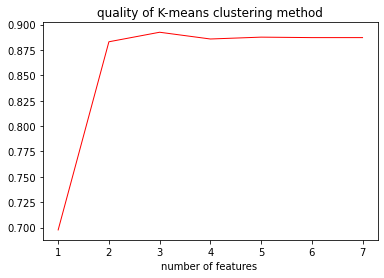

In [7]:
## Question 3.1 - part 3 ##

print('#####################################')
print('Question 3.1 - part 3 ')
print('#####################################')
print()

from sklearn import cluster, datasets, mixture
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn import decomposition
from sklearn.mixture import GaussianMixture
from sklearn import metrics
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd


dataset=pd.read_csv('files/wifi_localization.csv',header=None)

X = dataset.values[:,0:7]
Y = dataset.values[:,7]
random = np.random.seed(69007044)
clustring_quality=[]

for i in range(1,8):
    pca = PCA(n_components=i, random_state=random)
    pca.fit(X)

    X_PCA = pca.transform(X)

    kmeans = KMeans(n_clusters=4, random_state=random).fit(X_PCA)
    predict_label = kmeans.labels_

    clustring_quality.append(metrics.adjusted_mutual_info_score(Y, predict_label))

print(clustring_quality)
plt.plot([1,2,3,4,5,6,7], clustring_quality, color="red", linewidth=1)
plt.xlabel('number of features ')
plt.title('quality of K-means clustering method')
plt.show()


According to the above figure, quality of clustering with K-means method is high enough even for the  lower features. Moreover, the quality is higher for 3 features because PCA decreases the complexity and redundancy. We have an improvement for the lower features because K-means method works better for the lower dimensionality. The PCA helps K-means becuase it reduces the dimension of the data points. That is why we have an improvement. However, when we conduct a PCA analysis on the data with 1 dimension, the clustering quality of K-means method decreases. This is because by having just one dimension of the data points, we lose much information.

In [6]:
## Question 3.1 - part 4 ##

print('#####################################')
print('Question 3.1 - part 4 ')
print('#####################################')
print()

#####################################
Question 3.1 - part 4 
#####################################



K-means method is a clustering method and so it does not use the labels. Thus, when it is used for classification, it ignores the labels and that is why we should not use it for the classification.

As professor said in the lectures, the classification is classification and the clustering is clustering. We could do better classification by using the classification methods than using the clustering ones. Naturally, we will suffer if we use the K-means for classification.

# Section 4: Support Vector Machines (SVMs) <a name="SectionSupportVectorMachinesSVMs"></a>

We have covered the theory of [SVMs](https://en.wikipedia.org/wiki/Support-vector_machine) during the lectures. It is now time to see SVMs in action! It is appropriate to start with a noisy moon data set. We will use [sklearn.svm](https://scikit-learn.org/stable/modules/svm.html) library.

<IPython.core.display.Javascript object>


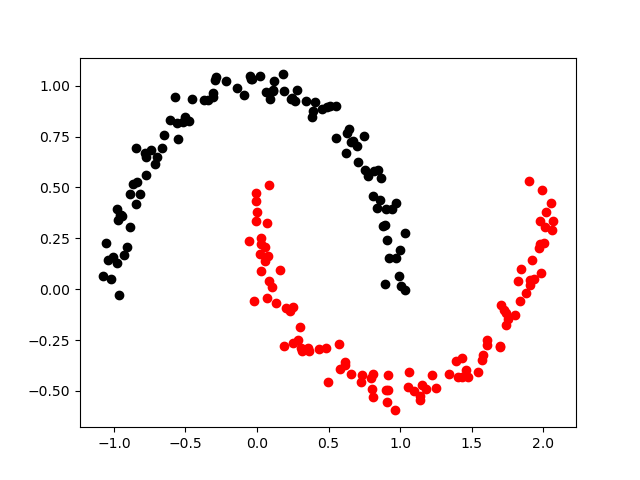

In [7]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn import metrics

# helper function to visualise decision boundary, uses the svm model as input
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1
                                 ], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# this is not necessary if you run it in the cell earlier...
#np.random.seed(Put the same or different group specific number!)

# Create a new moons data set
new_moons = datasets.make_moons(n_samples=400, noise=0.15)
Xm = new_moons[0] # data points
ym = new_moons[1] # 0, 1 labels of class, 200 each - giving us the ground truth

# Visualise the data set
order_ind = np.argsort(ym) # order labels, 200 each class
Xm1 = Xm[order_ind[0:200]]   # class 1 - only for visualisation
Xm2 = Xm[order_ind[201:400]] # class 2 - only for visualisation
plt.figure()
plt.scatter(X1[:,0], X1[:,1], color='black')
plt.scatter(X2[:,0], X2[:,1], color='red')
plt.show()

### Question 4.1 [20%] Binary SVM Classifiers  <a name="QuestionBinarySVMClassifiers"></a>

First divide the data $(Xm,ym)$ to training and test sets using the default ratio. The range of data values is OK so you can skip data normalisation for this one.

1. Try an [SVM classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) with a linear kernel and different C parameters. Plot the test output and boundary. Discuss your observations and comment on linear separability of this data. Provide the precision, recall, and F-score metrics. *Hint: see [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics), especially [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report)*
2. Next, use an [RBF kernel](https://en.wikipedia.org/wiki/Radial_basis_function_kernel) and repeat the first part for different C and gamma parameters. Do you observe an improvement compared to the linear version (both visually and in terms of scores)? Discuss your results.
3. Perform a cross-validated grid-search over a parameter grid to find good C and gamma hyper-parameters. Plot the AUC (`mean_train_AUC`) vs gamma for the best C. *Hint: check [GridSearchCV](https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html#sphx-glr-auto-examples-model-selection-plot-multi-metric-evaluation-py) and [scoring parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter). Note that you should use semi-log plot!*

#####################################
Question 4.1 - part 1 
#####################################

################## report for c=0.001 ##################
              precision    recall  f1-score   support

     class 0       0.86      0.84      0.85       515
     class 1       0.84      0.86      0.85       485

    accuracy                           0.85      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.85      0.85      0.85      1000



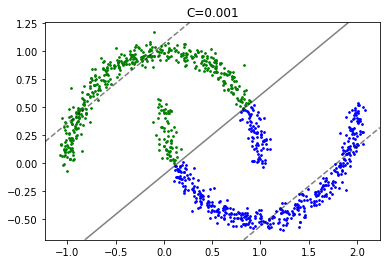

################## report for c=0.01 ##################
              precision    recall  f1-score   support

     class 0       0.89      0.88      0.88       515
     class 1       0.87      0.89      0.88       485

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



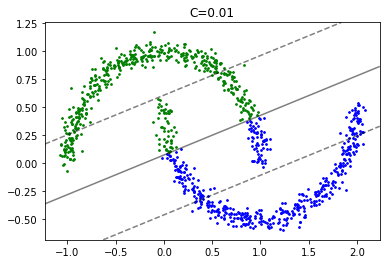

################## report for c=0.1 ##################
              precision    recall  f1-score   support

     class 0       0.91      0.89      0.90       515
     class 1       0.88      0.90      0.89       485

    accuracy                           0.90      1000
   macro avg       0.89      0.90      0.89      1000
weighted avg       0.90      0.90      0.90      1000



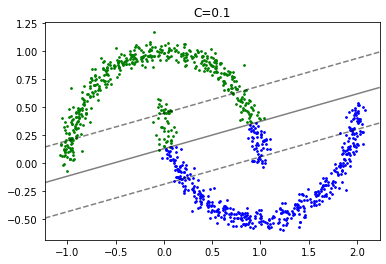

################## report for c=1 ##################
              precision    recall  f1-score   support

     class 0       0.91      0.89      0.90       515
     class 1       0.89      0.91      0.90       485

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



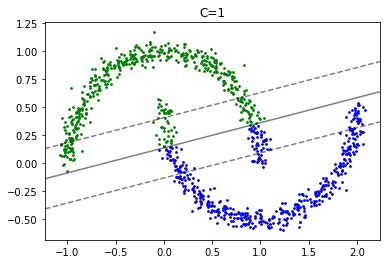

################## report for c=10 ##################
              precision    recall  f1-score   support

     class 0       0.91      0.89      0.90       515
     class 1       0.89      0.91      0.90       485

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



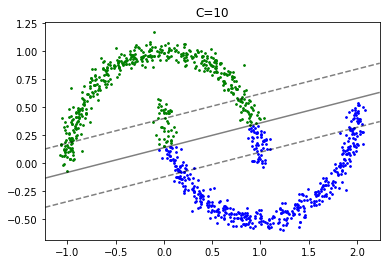

In [1]:
## Question 4.1 - part 1 ##

print('#####################################')
print('Question 4.1 - part 1 ')
print('#####################################')
print()

from sklearn import cluster, datasets, mixture
from sklearn.svm import LinearSVC,SVC
from sklearn.metrics import classification_report
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import pandas as pd


random = np.random.seed(69007044)

noisy_moons = datasets.make_moons(n_samples=5000, noise=0.05)
X = noisy_moons[0] # data points
Y = noisy_moons[1] # data points

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=random)

for c in [0.001,0.01,0.1,1,10]:

    clf = SVC(C=c,kernel='linear')
    clf.fit(X_train, y_train)

    predic_label=clf.predict(X_test)

    class0=[]
    class1=[]

    for count,item in enumerate(predic_label):
        if item == 0:
            class0.append(X_test[count])
        elif item == 1:
            class1.append(X_test[count])

    class0=np.array(class0)
    class1=np.array(class1)

    plt.scatter(class0[:,0], class0[:,1], color='green',s=3)

    plt.scatter(class1[:,0], class1[:,1], color='blue',s=3)
    ############################# report precision  recall  f1-score ###########################

    print('################## report for c=%s ##################'%c)
    target_names = ['class 0', 'class 1']
    print(classification_report(y_test, predic_label, target_names=target_names))
    # print(precision_recall_fscore_support(y_test, predic_label))
    ############################# plot boundary #######################
    ax=None
    plot_support=True

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = clf.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(clf.support_vectors_[:, 0],
                   clf.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.title('C=%s'%c)
    plt.show()

By increasing the C parameter in the linear kernel, the accuracy increases. However, this does not happen much for the C parameters greater than 0.1. I mean, the accuracy converges by increasing the C parameter and does not increase much for C>0.1. Also, the separability improvement in the linear kernel stops for the C>0.1.

#####################################
Question 4.1 - part 2.1 
#####################################

################## report for c=0.001 ##################
              precision    recall  f1-score   support

     class 0       0.88      0.82      0.85       515
     class 1       0.82      0.88      0.85       485

    accuracy                           0.85      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.85      0.85      0.85      1000



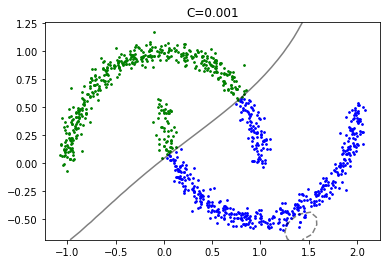

################## report for c=0.01 ##################
              precision    recall  f1-score   support

     class 0       0.94      0.93      0.94       515
     class 1       0.93      0.94      0.93       485

    accuracy                           0.94      1000
   macro avg       0.93      0.94      0.93      1000
weighted avg       0.94      0.94      0.94      1000



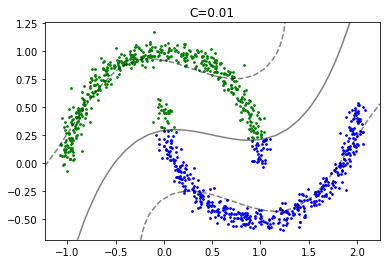

################## report for c=0.1 ##################
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       515
     class 1       1.00      1.00      1.00       485

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



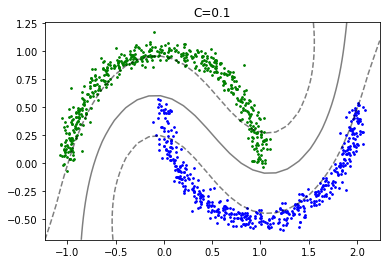

################## report for c=1 ##################
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       515
     class 1       1.00      1.00      1.00       485

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



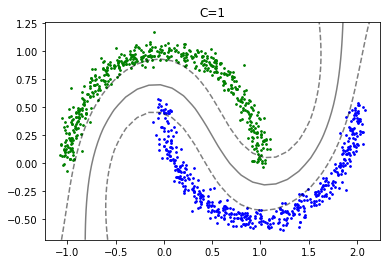

################## report for c=10 ##################
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       515
     class 1       1.00      1.00      1.00       485

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



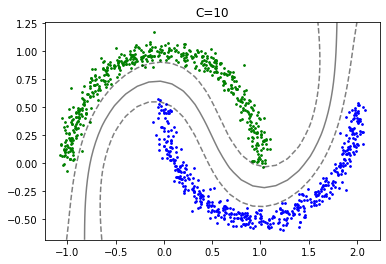

In [10]:
## Question 4.1 - part 2.1 ##

print('#####################################')
print('Question 4.1 - part 2.1 ')
print('#####################################')
print()

from sklearn import cluster, datasets, mixture
from sklearn.svm import LinearSVC,SVC
from sklearn.metrics import classification_report
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

random = np.random.seed(69007044)

noisy_moons = datasets.make_moons(n_samples=5000, noise=0.05)
X = noisy_moons[0] # data points
Y = noisy_moons[1] # data points

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=random)

for c in [0.001,0.01,0.1,1,10]:

    clf = SVC(C=c,kernel='rbf',gamma='auto')
    clf.fit(X_train, y_train)

    predic_label=clf.predict(X_test)

    class0=[]
    class1=[]

    for count,item in enumerate(predic_label):
        if item == 0:
            class0.append(X_test[count])
        elif item == 1:
            class1.append(X_test[count])

    class0=np.array(class0)
    class1=np.array(class1)

    plt.scatter(class0[:,0], class0[:,1], color='green',s=3)

    plt.scatter(class1[:,0], class1[:,1], color='blue',s=3)
    ############################# report precision  recall  f1-score ###########################

    print('################## report for c=%s ##################'%c)
    target_names = ['class 0', 'class 1']
    print(classification_report(y_test, predic_label, target_names=target_names))
    ############################# plot boundary #######################
    ax=None
    plot_support=True

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = clf.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(clf.support_vectors_[:, 0],
                   clf.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.title('C=%s'%c)
    plt.show()

By increasing the C parameter in the RBF kernel, the accuracy increases. However, this does not happen much for the C parameters greater than 0.01. I mean, the accuracy converges by increasing the C parameter and does not increase much for C>0.1. But the accuracy touches 1 and also, the separability of the data continues to be improved in RBF.

#####################################
Question 4.1 - part 2.2 
#####################################

################## report linear kernel for c=0.001 ##################
              precision    recall  f1-score   support

     class 0       0.86      0.84      0.85       515
     class 1       0.84      0.86      0.85       485

    accuracy                           0.85      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.85      0.85      0.85      1000

################## report rbf kernel for c=0.001 ##################
              precision    recall  f1-score   support

     class 0       0.88      0.82      0.85       515
     class 1       0.82      0.88      0.85       485

    accuracy                           0.85      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.85      0.85      0.85      1000



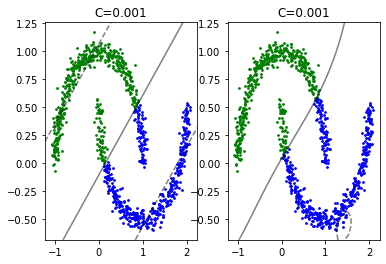

################## report linear kernel for c=0.01 ##################
              precision    recall  f1-score   support

     class 0       0.89      0.88      0.88       515
     class 1       0.87      0.89      0.88       485

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000

################## report rbf kernel for c=0.01 ##################
              precision    recall  f1-score   support

     class 0       0.94      0.93      0.94       515
     class 1       0.93      0.94      0.93       485

    accuracy                           0.94      1000
   macro avg       0.93      0.94      0.93      1000
weighted avg       0.94      0.94      0.94      1000



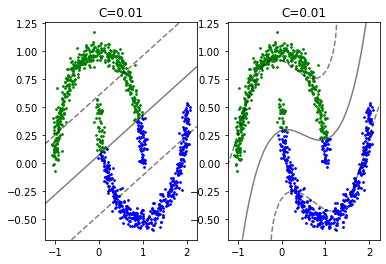

################## report linear kernel for c=0.1 ##################
              precision    recall  f1-score   support

     class 0       0.91      0.89      0.90       515
     class 1       0.88      0.90      0.89       485

    accuracy                           0.90      1000
   macro avg       0.89      0.90      0.89      1000
weighted avg       0.90      0.90      0.90      1000

################## report rbf kernel for c=0.1 ##################
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       515
     class 1       1.00      1.00      1.00       485

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



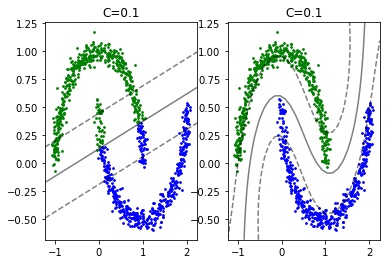

################## report linear kernel for c=1 ##################
              precision    recall  f1-score   support

     class 0       0.91      0.89      0.90       515
     class 1       0.89      0.91      0.90       485

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000

################## report rbf kernel for c=1 ##################
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       515
     class 1       1.00      1.00      1.00       485

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



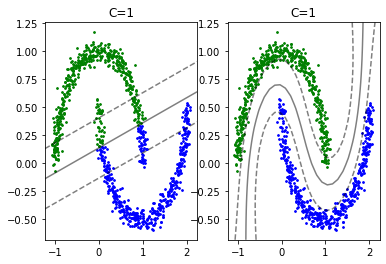

################## report linear kernel for c=10 ##################
              precision    recall  f1-score   support

     class 0       0.91      0.89      0.90       515
     class 1       0.89      0.91      0.90       485

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000

################## report rbf kernel for c=10 ##################
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       515
     class 1       1.00      1.00      1.00       485

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



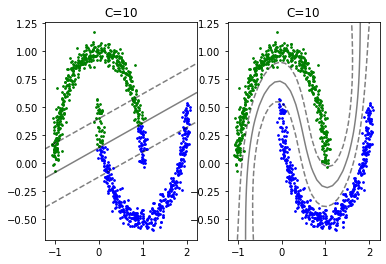

In [11]:
## Question 4.1 - part 2.2 ##

print('#####################################')
print('Question 4.1 - part 2.2 ')
print('#####################################')
print()

from sklearn import cluster, datasets, mixture
from sklearn.svm import LinearSVC,SVC
from sklearn.metrics import classification_report
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

random = np.random.seed(69007044)

noisy_moons = datasets.make_moons(n_samples=5000, noise=0.05)
X = noisy_moons[0] # data points
Y = noisy_moons[1] # data points

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=random)

for c in [0.001,0.01,0.1,1,10]:
    ######################################## linear kernel svm ###################################
    clf = SVC(C=c,kernel='linear')
    clf.fit(X_train, y_train)

    predic_label=clf.predict(X_test)

    class0=[]
    class1=[]

    for count,item in enumerate(predic_label):
        if item == 0:
            class0.append(X_test[count])
        elif item == 1:
            class1.append(X_test[count])

    class0=np.array(class0)
    class1=np.array(class1)
    plt.subplot(1, 2, 1)
    plt.scatter(class0[:,0], class0[:,1], color='green',s=3)

    plt.scatter(class1[:,0], class1[:,1], color='blue',s=3)
    ############################# report precision  recall  f1-score ###########################

    print('################## report linear kernel for c=%s ##################'%c)
    target_names = ['class 0', 'class 1']
    print(classification_report(y_test, predic_label, target_names=target_names))
    ############################# plot boundary #######################
    ax=None
    plot_support=True

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = clf.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(clf.support_vectors_[:, 0],
                   clf.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.title('C=%s'%c)
    ######################################## rbf kernel svm ###################################
    ###########################################################################################
    clf = SVC(C=c, kernel='rbf', gamma='auto')
    clf.fit(X_train, y_train)

    predic_label = clf.predict(X_test)

    class0 = []
    class1 = []

    for count, item in enumerate(predic_label):
        if item == 0:
            class0.append(X_test[count])
        elif item == 1:
            class1.append(X_test[count])

    class0 = np.array(class0)
    class1 = np.array(class1)

    plt.subplot(1, 2, 2)
    plt.scatter(class0[:, 0], class0[:, 1], color='green', s=3)
    plt.scatter(class1[:, 0], class1[:, 1], color='blue', s=3)
    ############################# report precision  recall  f1-score ###########################

    print('################## report rbf kernel for c=%s ##################' % c)
    target_names = ['class 0', 'class 1']
    print(classification_report(y_test, predic_label, target_names=target_names))
    ############################# plot boundary #######################
    ax = None
    plot_support = True

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = clf.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(clf.support_vectors_[:, 0],
                   clf.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.title('C=%s' % c)
    plt.show()

Firstly, for the same C parameter, the accuracy of the RBF kernel is better than the linear kernel. Thus, the accuracy touches 1 in the RBF kernel.

Secondly, although when the accuracy is high in both linear and RBF kernels, it does not increase much by increasing the C parameter, the separability of the data continues to be improved in RBF. However, the improvement in the linear kernel stops. This is because the linear kernel is so simple kernel compared to the RBF kernel. This shows that the complexity in the RBF kernel helps it to learn better.

#####################################
Question 4.1 - part 3 
#####################################

The best parameters are {'C': 0.1, 'gamma': 10.0} with a score of 1.00


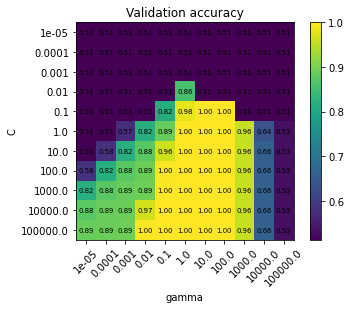

In [14]:
## Question 4.1 - part 3 ##

print('#####################################')
print('Question 4.1 - part 3 ')
print('#####################################')
print()

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

from sklearn import cluster, datasets, mixture
from sklearn.svm import LinearSVC,SVC
from sklearn.metrics import classification_report,accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

# dataset for grid search
random = np.random.seed(69007044)
noisy_moons = datasets.make_moons(n_samples=500, noise=0.05)
X = noisy_moons[0] # data points
Y = noisy_moons[1] # data points

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=random)

C_range = np.logspace(-5, 5, 11)
gamma_range = np.logspace(-5, 5, 11)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=random)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

scores = grid.cv_results_["mean_test_score"].reshape(len(C_range), len(gamma_range))

plt.imshow(scores)
plt.xlabel("gamma")
plt.ylabel("C")
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title("Validation accuracy")

acc_shape=scores.shape

for i in range(acc_shape[0]):
    for j in range(acc_shape[1]):
        c = "%.2f" % scores[i,j]
        plt.text(j, i, str(c), va='center', ha='center',fontsize='x-small')
plt.show()

For the best amount of the C parameter (C = 0.1) and by increasing the gamma parameter, the accuracy inreases at the first steps (until gamma = 10) , then it decreases. Also, this is true for other amount of C parameter when it is higher than 0.01. But when the C<0.01, the gamma parameter cannot considerably have impact on the accuracy.

Moreover, for the fixed amount of the gamma parameter, the accuracy always increases by increasing the C parameter.

# Section 5: Logistic Regression <a name="SectionLogisticRegression"></a>

Logistic regression uses a linear statistical model. It measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic function. It is also used for classification. Let's start with a very simple example to **visualise the logistic function**.

<IPython.core.display.Javascript object>


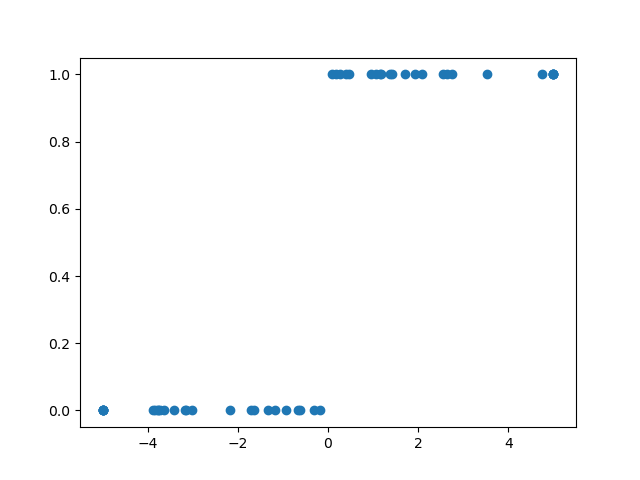

In [8]:
# Generate a toy dataset

toy_samples = 50
X_toy = np.linspace(-5, 5, toy_samples)
Xtoy_test = np.linspace(-5, 5, 200)
# gaussian noise added
X_toy = X_toy + 2*np.random.normal(size=toy_samples)
# upper, lower bound
X_toy = np.clip(X_toy,-5, 5).reshape(-1,1)
# create labels
y_toy = ((np.sign(X_toy)+1)/2.0).ravel()

# visualise
plt.figure()
plt.scatter(X_toy, y_toy)
plt.show()

### Question 5.1 [5%] Simple Logistic Regression (LR)  <a name="QuestionSimpleLogisticRegressionLR"></a>

1. Fit a logistic and linear regression model to the data *(X_toy, y_toy)*. Find the logistic and linear model coefficients and bias (`trained_model.coef_`, `trained_model.intercept_`). Hint: check [sklearn logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).
2.  Test your models on a simple test set (`Xtoy_test`) given above. Plot your results and discuss.

#####################################
Question 5.1 - part 1 & 2
#####################################



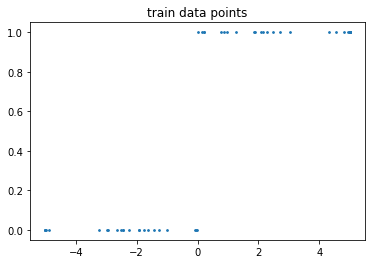

The linear model coefficient is :  [[1.86757118]]
The linear model bias is :  [0.19476885]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


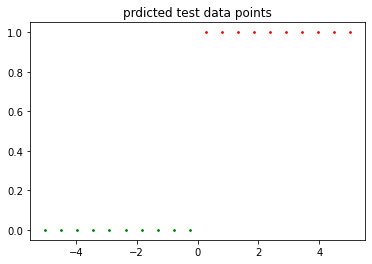

In [32]:
## Question 5.1 - part 1 & 2 ##

print('#####################################')
print('Question 5.1 - part 1 & 2')
print('#####################################')
print()

import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
# import pandas as pd

####### part 1 #####
toy_samples = 50
X_toy = np.linspace(-5, 5, toy_samples)
Xtoy_test = np.linspace(-5, 5,20)
# gaussian noise added
X_toy = X_toy + 2*np.random.normal(size=toy_samples)
# upper, lower bound
X_toy = np.clip(X_toy,-5, 5).reshape(-1,1)
# create labels
y_toy = ((np.sign(X_toy)+1)/2.0).ravel()
# visualise plt.figure() plt.scatter(X_toy, y_toy) plt.show()
train_model = LogisticRegression(random_state=69007044).fit(X_toy,y_toy)
# visualise
plt.figure()
plt.scatter(X_toy, y_toy,s=3)
plt.title('train data points')
plt.show()

print('The linear model coefficient is : ' , train_model.coef_)
print('The linear model bias is : ' , train_model.intercept_)
print()

####### part 2 #####
Xtoy_test = np.clip(Xtoy_test,-5, 5).reshape(-1,1)
ytoy_test = ((np.sign(Xtoy_test)+1)/2.0).ravel()
predict=train_model.predict(Xtoy_test)
print (predict)

class0=[]
class1=[]
for count,item in enumerate(predict):
    if item == 0:
        class0.append(Xtoy_test[count])
    elif item == 1:
        class1.append(Xtoy_test[count])

class0=np.array(class0)
class1=np.array(class1)
# print(class0)
#####
plt.scatter(class0, np.zeros(len(class0)), color='green',s=3)

plt.scatter(class1, np.ones(len(class1)), color='red',s=3)

plt.title('prdicted test data points')

plt.show()

The red points are in the class 1 and the green ones are in the class 0. If a red point value was less than zero (in the left side of zero), the prediction would not be correct. Also, a green point value was greater than zero (in the right side of zero), the prediction would not be correct.

Thus, the prediction is correct because all predicted points are in the correct area.

## _Example 5.1: Electrical Grid Stability with Simulated Data_ <a name="ExampleElectricalGridStabilitywithSimulatedData"></a>

This simulated [dataset](http://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+) is related to the local stability of a 4-node star system (where the electricity producer is in the center), which implements a decentralised Smart Grid Control concept. 

>Arzamasov, Vadim, Klemens Boehm, and Patrick Jochem. ['Towards Concise Models of Grid Stability.'](https://dbis.ipd.kit.edu/download/DSGC_simulations.pdf) Communications, Control, and Computing Technologies for Smart Grids (SmartGridComm), 2018 IEEE International Conference on. IEEE, 2018 

*Note: In many engineering applications, such datasets can be generated through simulations (easy) or experimentation (harder). Different from classical ML applications, engineers often have a very good understanding of the underlying physical models, which gives a unique advantage. We will, however, keep it simple in this workshop and use the dataset as is.*

Let's load and process the dataset.

In [9]:
griddata = pd.read_csv('files/Data_for_UCI_named.csv')
griddata.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [10]:
Xgrid = griddata.iloc[:, 0:13]
Xgrid.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860


In [11]:
ygrid = griddata.iloc[:, 13]
# 0 if unstable and 1 if stable
ygrid = [ 0 if x=='unstable' else 1 for x in ygrid]

print("prepared data: ",Xgrid[0:5], ygrid[0:5])

prepared data:         tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4      stab  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860   [0, 1, 0, 0, 0]


### Question 5.2 [15%] Checking Grid Stability using Logistic Regression (LR)  <a name="QuestionCheckingGridStabilityusingLogisticRegressionLR"></a>

Now, we can use the simulated dataset (`Xgrid`, `ygrid`) to check grid stability. We will use first logistic regression for this purpose. Unfortunately, it is not possible to directly visualise this dataset, so we have to use performance metrics.

1. Preprocess and normalise `Xgrid` using a [*sklearn.preprocessing*](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing). You can use, for example, `StandardScaler` or `MinMaxScaler`.
2. Train a logistic regression model that classifies the grid as stable or not, based on input `Xgrid`. Don't forget to divide `Xgrid` into training and test sets. Quantify the performance of LR using standard metrics such as accuracy, precision, recall, and f1 score on the test set. Plot the [ROC curve](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). How do these change w.r.t. [parameter C](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)? Discuss your observations.
3. What are the coefficients of the LR that you trained? What do they tell you about the impact of independent input variables on the dependent output variable `ygrid`? Discuss. *Hint: you can use [statsmodels package](https://www.statsmodels.org) logistic regression to calculate p-values. Here is a nice [tutorial](https://pythonguides.com/scikit-learn-logistic-regression/) on this. For further info, see e.g. [this](http://www.r-tutor.com/elementary-statistics/logistic-regression/significance-test-logistic-regression) or [this](http://blog.minitab.com/blog/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients).* 
4. Use a nonlinear SVM, e.g. with rbf kernel, to solve the problem. Quantify the performance of SVM classifier and compare with LR one. Discuss your findings.

**Answer as text here**

In [33]:
## Question 5.2 - part 1 ##

print('#####################################')
print('Question 5.2 - part 1')
print('#####################################')
print()

import pandas as pd
from sklearn.preprocessing import StandardScaler

griddata = pd.read_csv('files/Data_for_UCI_named.csv')
griddata.head()

Xgrid = griddata.iloc[:, 0:13]
Xgrid.head()

ygrid = griddata.iloc[:, 13]
# 0 if unstable and 1 if stable
ygrid = [ 0 if x=='unstable' else 1 for x in ygrid]

scaler = StandardScaler()
scaler.fit(Xgrid)

print(scaler.transform(Xgrid))


#####################################
Question 5.2 - part 1
#####################################

[[-0.83537431 -0.79131661  1.14170354 ...  1.32162751  1.57902607
   1.07312049]
 [ 1.47829663 -0.12670487 -0.80311147 ...  0.13542358  0.93625569
  -0.58748693]
 [ 1.35709296  1.31213982 -0.80349871 ...  1.14659574 -1.51380226
  -0.33209522]
 ...
 [-1.05234609 -0.87804866  1.28587062 ... -1.37001303 -1.38205402
  -1.28776846]
 [ 1.59768553 -0.45784646 -0.90902909 ...  1.32772953  1.06982944
   0.59749703]
 [ 0.4669346   0.55855544 -0.32829064 ... -0.53325125  1.52285961
   0.79996368]]


#####################################
Question 5.2 - part 2
#####################################

number of training data for X is =  7500
number of training data for y is =  7500
number of testing data for X is =  2500
number of testing data for y is =  2500
accuracy is :  0.9972


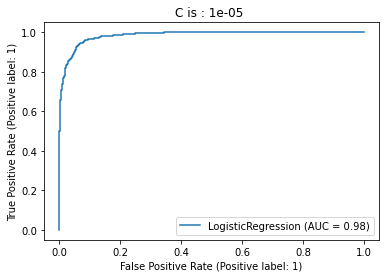

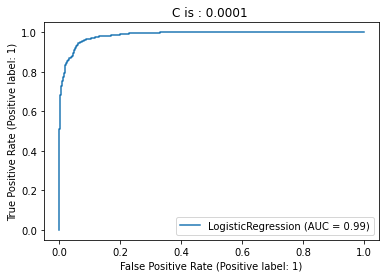

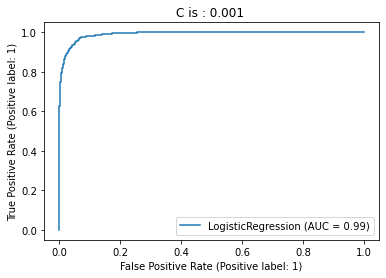

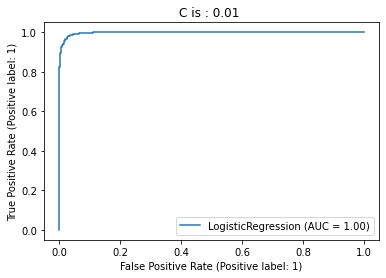

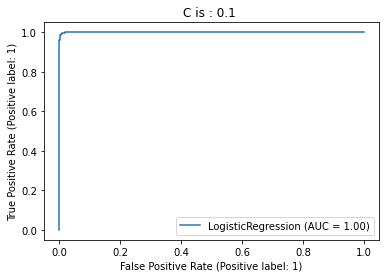

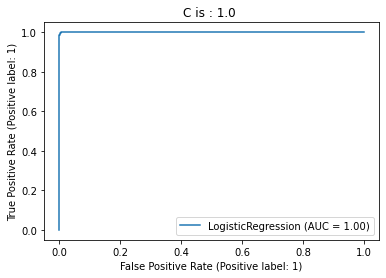

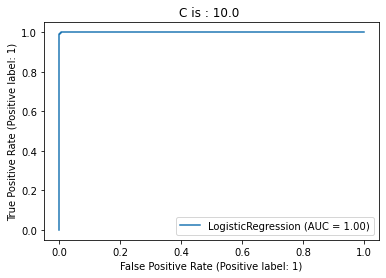

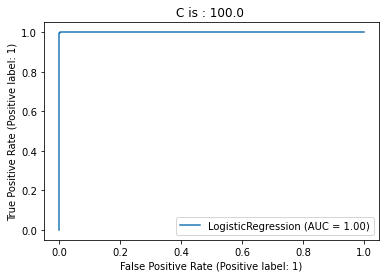

In [59]:
## Question 5.2 - part 2 ##

print('#####################################')
print('Question 5.2 - part 2')
print('#####################################')
print()

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support

griddata = pd.read_csv('files/Data_for_UCI_named.csv')
griddata.head()

Xgrid = griddata.iloc[:, 0:13]
Xgrid.head()

ygrid = griddata.iloc[:, 13]
# 0 if unstable and 1 if stable
ygrid = [ 0 if x=='unstable' else 1 for x in ygrid]

scaler = StandardScaler()
scaler.fit(Xgrid)

Xgrid = scaler.transform(Xgrid)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(Xgrid, ygrid)

print('number of training data for X is = ', len(X_train))
print('number of training data for y is = ', len(y_train))

print('number of testing data for X is = ', len(X_test))
print('number of testing data for y is = ', len(y_test))

train_model = LogisticRegression(random_state=69007044).fit(X_train,y_train)

y_predict=train_model.predict(X_test)

accuracy =accuracy_score(y_test,y_predict)

print('accuracy is : ' , accuracy)

precision_recall_fscore_support(y_test, y_predict, average='micro')

C_range = np.logspace(-5, 2, 8)

for c in C_range:
    train_model = LogisticRegression(random_state=69007044,C=c).fit(X_train,y_train)
    y_predict=train_model.predict(X_test)
    metrics.plot_roc_curve(train_model, X_test, y_test)
    plt.title('C is : %s ' %c)

By increasing the C parameter, the AUC is improved and ROC becomes sharper which show the regularisation increases the accuracy.

In [81]:
## Question 5.2 - part 4 ##

print('#####################################')
print('Question 5.2 - part 4')
print('#####################################')
print()

from sklearn import cluster, datasets, mixture
from sklearn.svm import LinearSVC,SVC
from sklearn.metrics import classification_report
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support

griddata = pd.read_csv('files/Data_for_UCI_named.csv')
griddata.head()

Xgrid = griddata.iloc[:, 0:13]
Xgrid.head()

ygrid = griddata.iloc[:, 13]
# 0 if unstable and 1 if stable
ygrid = [ 0 if x=='unstable' else 1 for x in ygrid]

scaler = StandardScaler()
scaler.fit(Xgrid)

Xgrid = scaler.transform(Xgrid)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(Xgrid, ygrid)

print('number of training data for X is = ', len(X_train))
print('number of training data for y is = ', len(y_train))

print('number of testing data for X is = ', len(X_test))
print('number of testing data for y is = ', len(y_test))

range_C = np.logspace(-5, 5, 11)

for c in range_C:
    
    clf = SVC(C=c,kernel='rbf',gamma='auto')
    clf.fit(X_train, y_train)
    y_predict_svm=clf.predict(X_test)
    accuracy_svm =accuracy_score(y_test,y_predict_svm)

    
    train_model = LogisticRegression(random_state=69007044,C=c).fit(X_train,y_train)
    y_predict_LR = train_model.predict(X_test)
    accuracy_LR = accuracy_score(y_test,y_predict_LR)
    print('c is :' , c)
    print('accuracy for SVM is : ' , accuracy_svm)
    print('accuracy for LR is :' , accuracy_LR)
    print()


#####################################
Question 5.2 - part 4
#####################################

number of training data for X is =  7500
number of training data for y is =  7500
number of testing data for X is =  2500
number of testing data for y is =  2500
c is : 1e-05
accuracy for SVM is :  0.6424
accuracy for LR is : 0.6424

c is : 0.0001
accuracy for SVM is :  0.6424
accuracy for LR is : 0.7132

c is : 0.001
accuracy for SVM is :  0.6424
accuracy for LR is : 0.9372

c is : 0.01
accuracy for SVM is :  0.9424
accuracy for LR is : 0.9688

c is : 0.1
accuracy for SVM is :  0.9744
accuracy for LR is : 0.9896

c is : 1.0
accuracy for SVM is :  0.986
accuracy for LR is : 0.9964

c is : 10.0
accuracy for SVM is :  0.9844
accuracy for LR is : 0.9984

c is : 100.0
accuracy for SVM is :  0.982
accuracy for LR is : 0.9992

c is : 1000.0
accuracy for SVM is :  0.982
accuracy for LR is : 0.9996

c is : 10000.0
accuracy for SVM is :  0.982
accuracy for LR is : 0.9996

c is : 100000.0
accuracy 

The results show that LR always has higher accuracy than SVM.

# <font color='red'> Workshop Assessment Instructions </font> <a name="fontcolorredWorkshopAssessmentInstructionsfont"></a>

_You should complete the workshop tasks and answer the questions within the allocated session!_ **Submission deadline is the  the end of second Week of the workshop. Please check Canvas for exact deadline!**

It is **mandatory to follow all of the submissions guidelines** given below. _Don't forget the Report submission information on top of this notebook!_

1. The completed Jupyter notebook and its Pdf version (you can simply print-preview and then print as pdf from within your browser) should be uploaded to the right place in Canvas. _It is your responsibility to follow the announcements!_ **Late submissions will be penalised (up to 100% of the total mark depending on delay amount)!**
2. Filename should be “ELEN90088 Workshop **W: StudentID1-StudentID2** of session **Day-Time**", where **W** refers to the workshop number, **StudentID1-StudentID2** are your student numbers, **Day-Time** is your session day and time, e.g. *Tue-14*.
3. Answers to questions, simulation results and diagrams should be included in the Jupyter notebook as text, code, plots. *If you don't know latex, you can write formulas/text to a paper by hand, scan it and then include as image within Markdown cells.*
4. Please submit your report individually. Partners can submit the same report. 

## Workshop Marking <a name="WorkshopMarking"></a>

* **Each workshop has 10 points corresponding to 10% of the total subject mark.** You will receive 3 points from the submitted report and 7 points from an **individual oral examination.** 
* Individual oral quizzes will be scheduled within the next two weeks following the report submission. They will be during workshop hours. Therefore, it is important that you attend the workshops!
* The individual oral examination will assess your answers to workshop questions, what you have done in that workshop, and your knowledge of the subject material in association with the workshop.
 
### Additional guidelines for your programs: <a name="Additionalguidelinesforyourprograms"></a>

* Write modular code using functions. 
* Properly indent your code. But Python forces you do that anyway ;)
* Heavily comment the code to describe your implementation and to show your understanding. No comments, no credit!
* Make the code your own! It is encouraged to find and get inspired by online examples but you should exactly understand, modify as needed, and explain your code via comments. If you resort to blind copy/paste, you will certainly not do well in the individual oral quizzes.